# cygnus


In [1]:
from importlib import reload

from matplotlib import cm

from utils import plots, tables
#%matplotlib widget

In [20]:
# Knobs
paths = {
    # Baseline models
    'degree1_features': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_features.csv', # Different Pythia features (max pooling, degree 1, 3 tilings)
    'degree1_baseline': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_baseline.csv', # Different baselines (BO, SPP, Bingo, next-line)
    # Tuned Pythia models
    # Pythia tuned: epsilon ~1.8%, untimely reward = -1
    'degree1_tuned': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned.csv', 
    'degree1_tuned_nofallback': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned_nofallback.csv',
    'degree1_tuned_nozeroaction': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_tuned_nozeroaction.csv',
    # Featureless models (Pythia bias-only, Cygnus, BO)
    'degree1_featureless': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless.csv',
    'degree1_featureless_tuned': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned.csv',
    'degree1_featureless_tuned_nofallback': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_nofallback.csv',
    'degree1_featureless_tuned_nozeroaction': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_nozeroaction.csv',
    # Cygnus with different action selection schemes.
    # 'degree1_featureless_tuned_ucb': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_ucb.csv',
    # 'degree1_featureless_tuned_acc': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_acc.csv',
    # 'degree1_featureless_tuned_timelyacc': '/u/cmolder/GitHub/ChampSim/out/pythia/degree1_featureless_tuned_timelyacc.csv',
}

suites = [
    ('spec06', 'one_phase'),
    #('spec06', 'weighted'),
    ('gap', 'one_phase')
]
metrics  = [
    'ipc_improvement', 
    'L2C_issued_prefetches', 
    #'L2C_accuracy', 
    'L2C_coverage',
    #'L2C_mpki_reduction', 
]
features = [{'Delta_Path', 'PC_Delta'}]
baselines = ['bo', 'spp_dev2', 'bingo', 'next_line']
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [21]:
from importlib import reload
from utils import utils
reload(tables)
reload(utils)
dfs = {
    # Baseline models
    'degree1_baseline': tables.load_stats_csv(paths['degree1_baseline'], baselines, prefetchers_level='l2'),
    'degree1_baseline_pythia': tables.load_stats_csv_pythia(paths['degree1_baseline'], features),
    # Tuned Pythia models
    'degree1_tuned': tables.load_stats_csv_pythia(paths['degree1_tuned'], features),
    'degree1_tuned_nofallback': tables.load_stats_csv_pythia(paths['degree1_tuned_nofallback'], features),
    'degree1_tuned_nozeroaction': tables.load_stats_csv_pythia(paths['degree1_tuned_nozeroaction'], features),
    # Featureless models (Pythia bias-only, Cygnus, BO)
    'degree1_featureless': tables.load_stats_csv(paths['degree1_featureless'], ['pythia', 'cygnus'], prefetchers_level='l2'),
    'degree1_featureless_tuned': tables.load_stats_csv(paths['degree1_featureless_tuned'], ['pythia', 'cygnus', 'bo'], prefetchers_level='l2'),
    'degree1_featureless_tuned_nofallback': tables.load_stats_csv(paths['degree1_featureless_tuned_nofallback'], ['pythia', 'cygnus'], prefetchers_level='l2'),
    'degree1_featureless_tuned_nozeroaction': tables.load_stats_csv(paths['degree1_featureless_tuned_nozeroaction'], ['pythia', 'cygnus', 'bo'], prefetchers_level='l2'),
    # Cygnus with different action selection schemes.
    # 'degree1_featureless_tuned_ucb': tables.load_stats_csv(paths['degree1_featureless_tuned_ucb'], ['cygnus'], prefetchers_level='l2'),
    # 'degree1_featureless_tuned_acc': tables.load_stats_csv(paths['degree1_featureless_tuned_acc'], ['cygnus'], prefetchers_level='l2'),
    # 'degree1_featureless_tuned_timelyacc': tables.load_stats_csv(paths['degree1_featureless_tuned_timelyacc'], ['cygnus'], prefetchers_level='l2'),
}

## Baseline comparison

=== spec06 one_phase ===


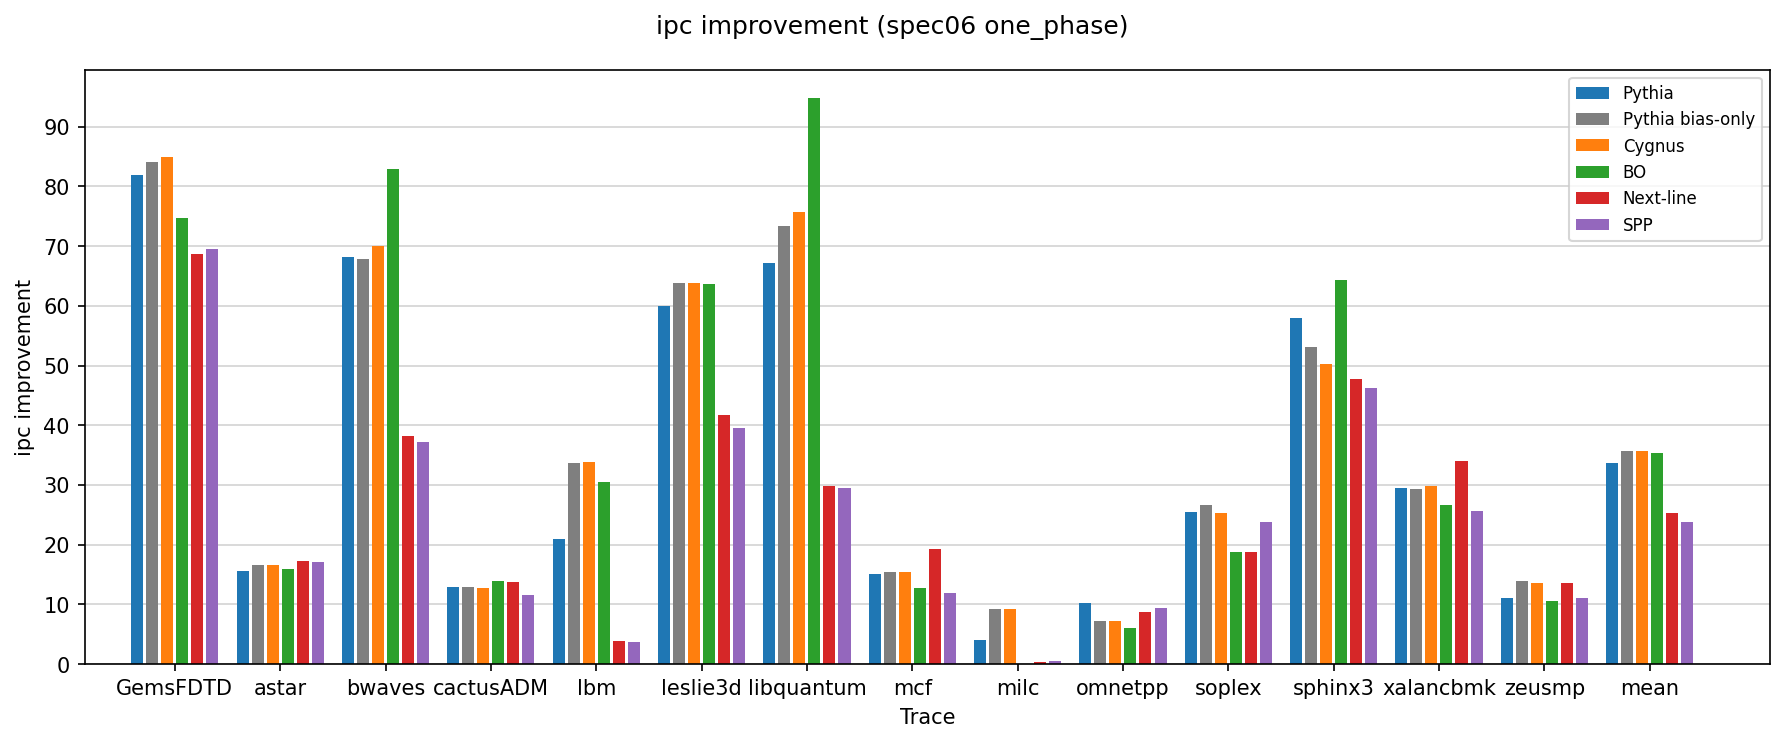

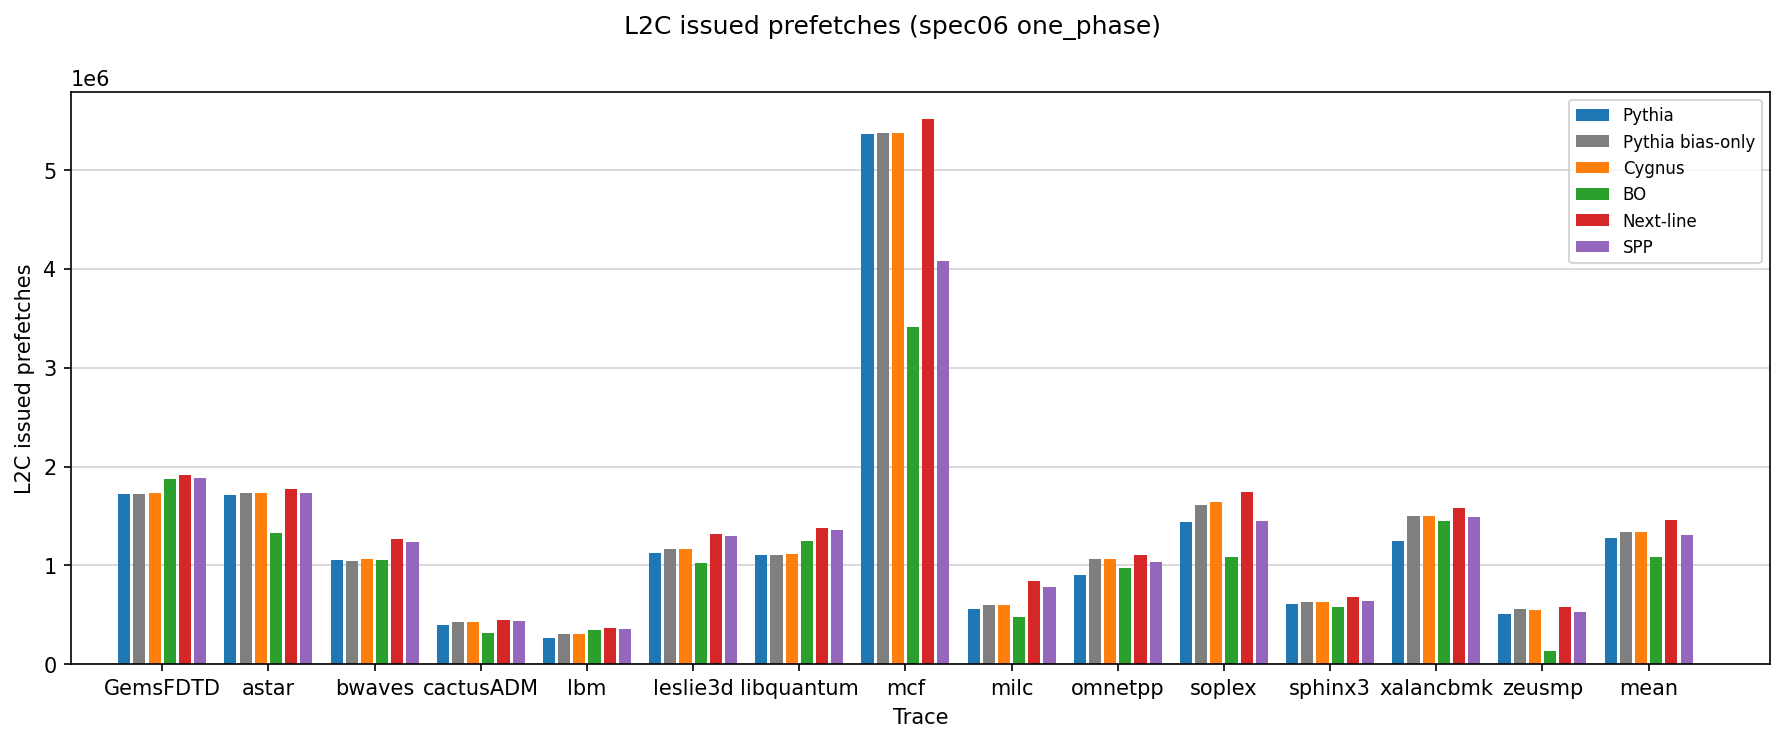

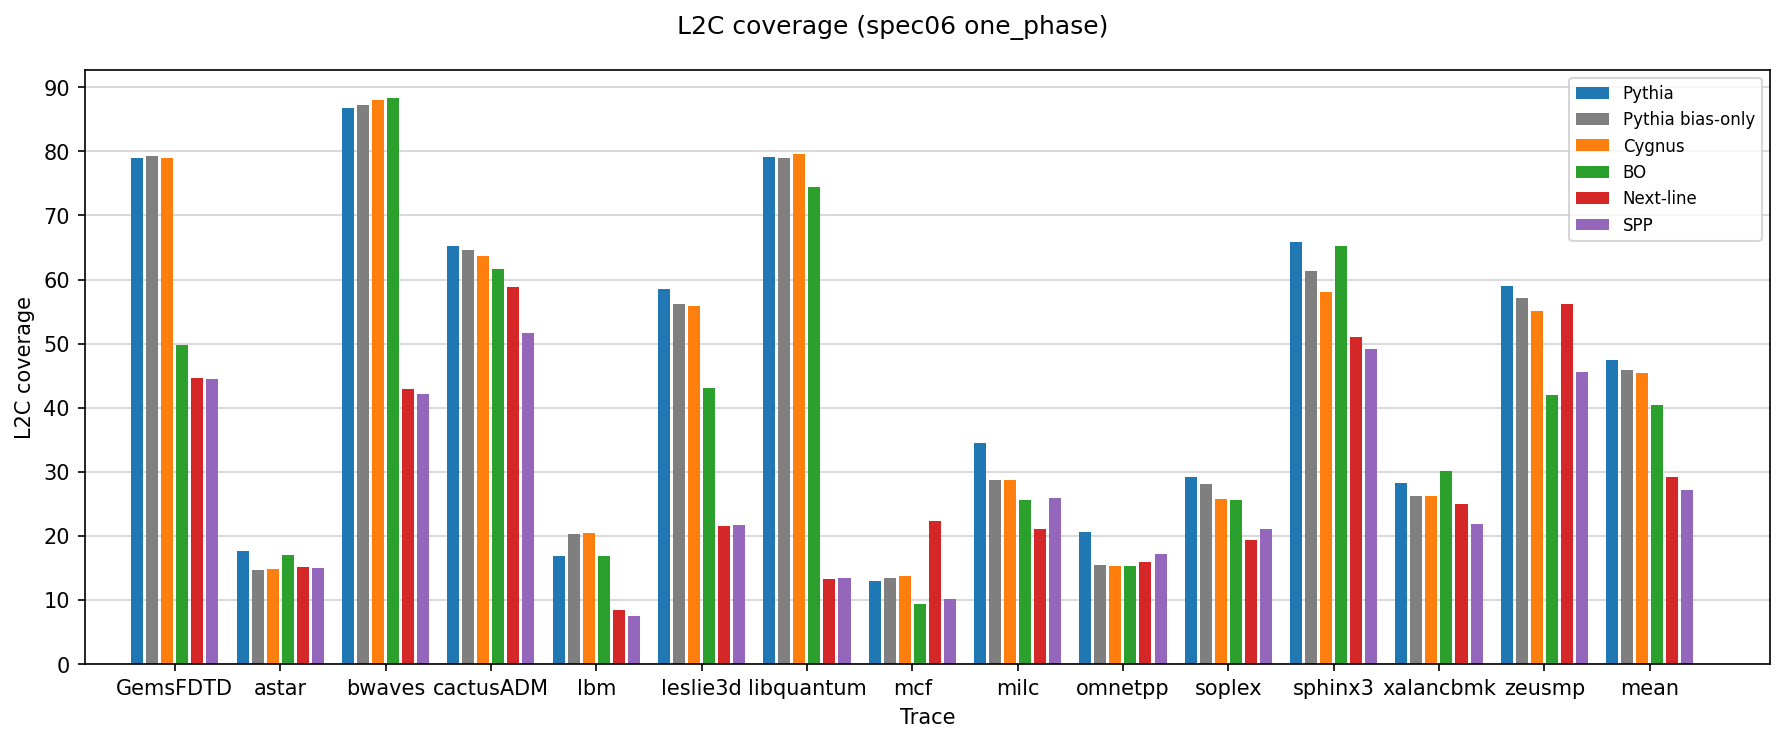

=== gap one_phase ===


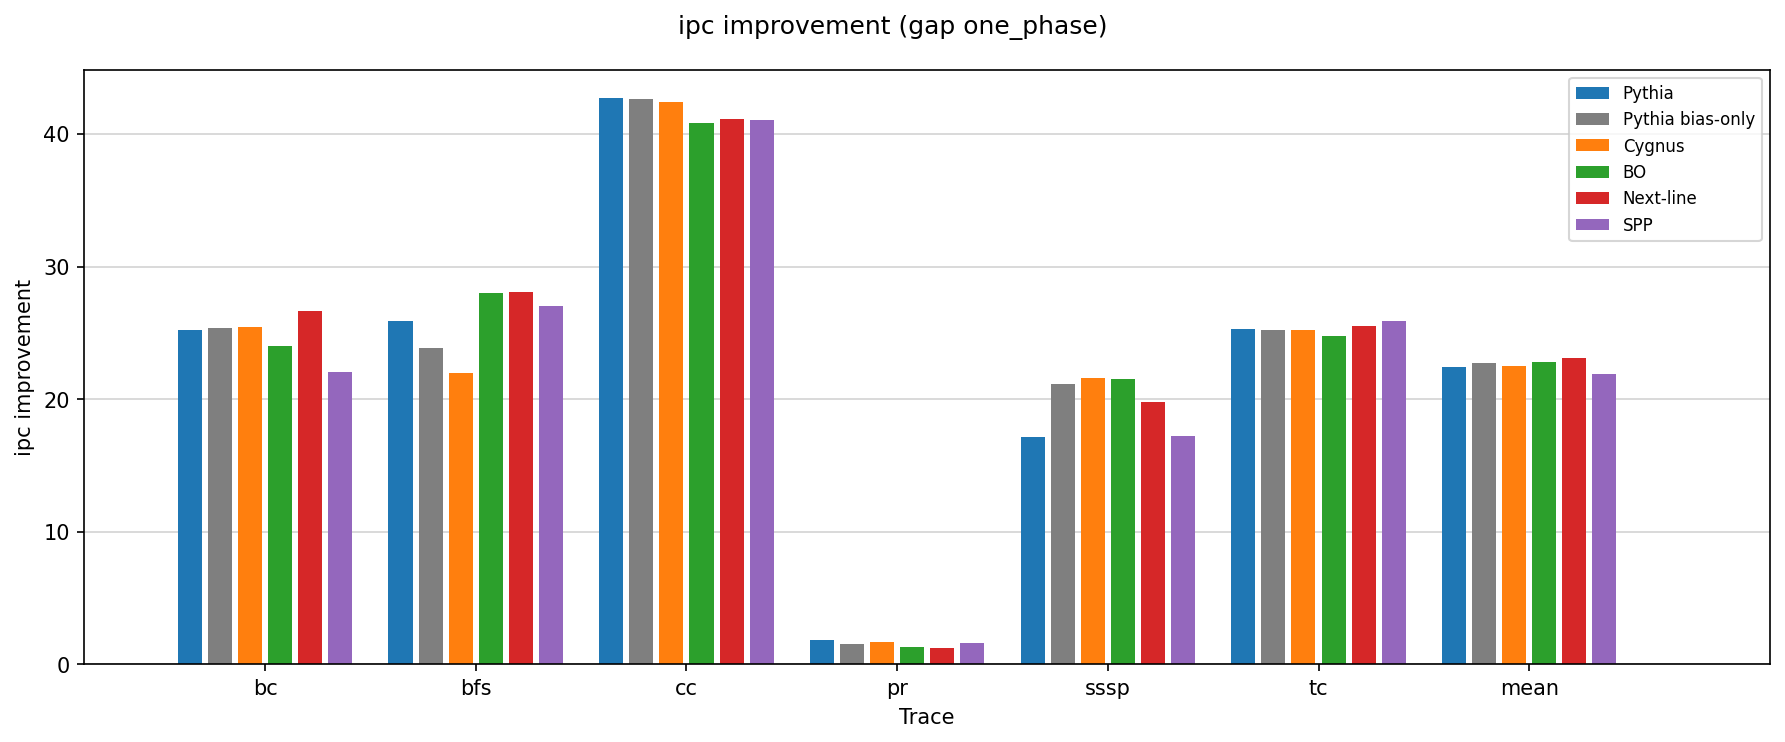

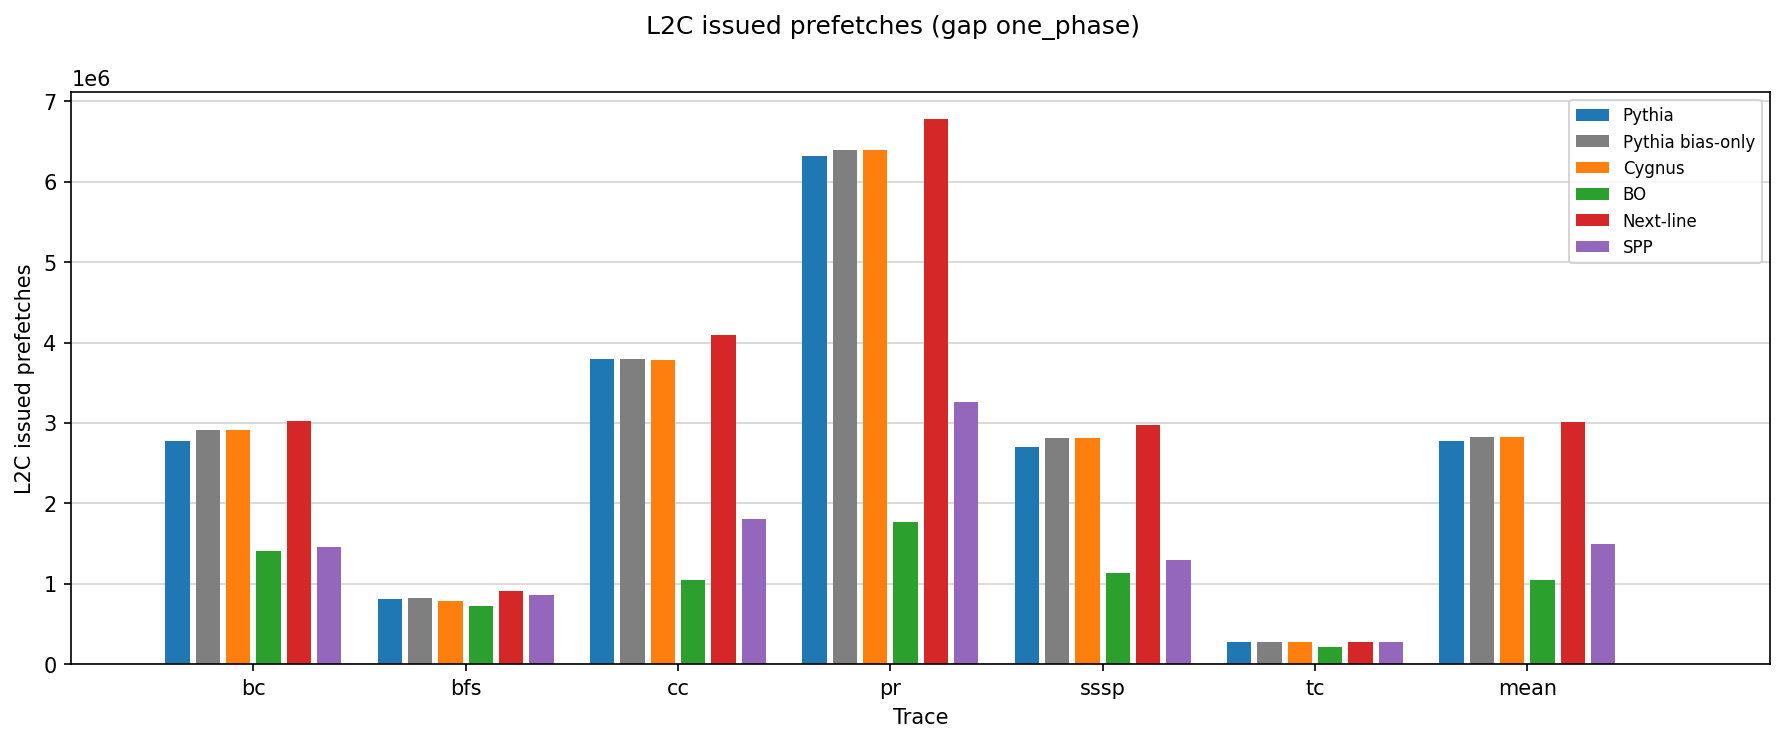

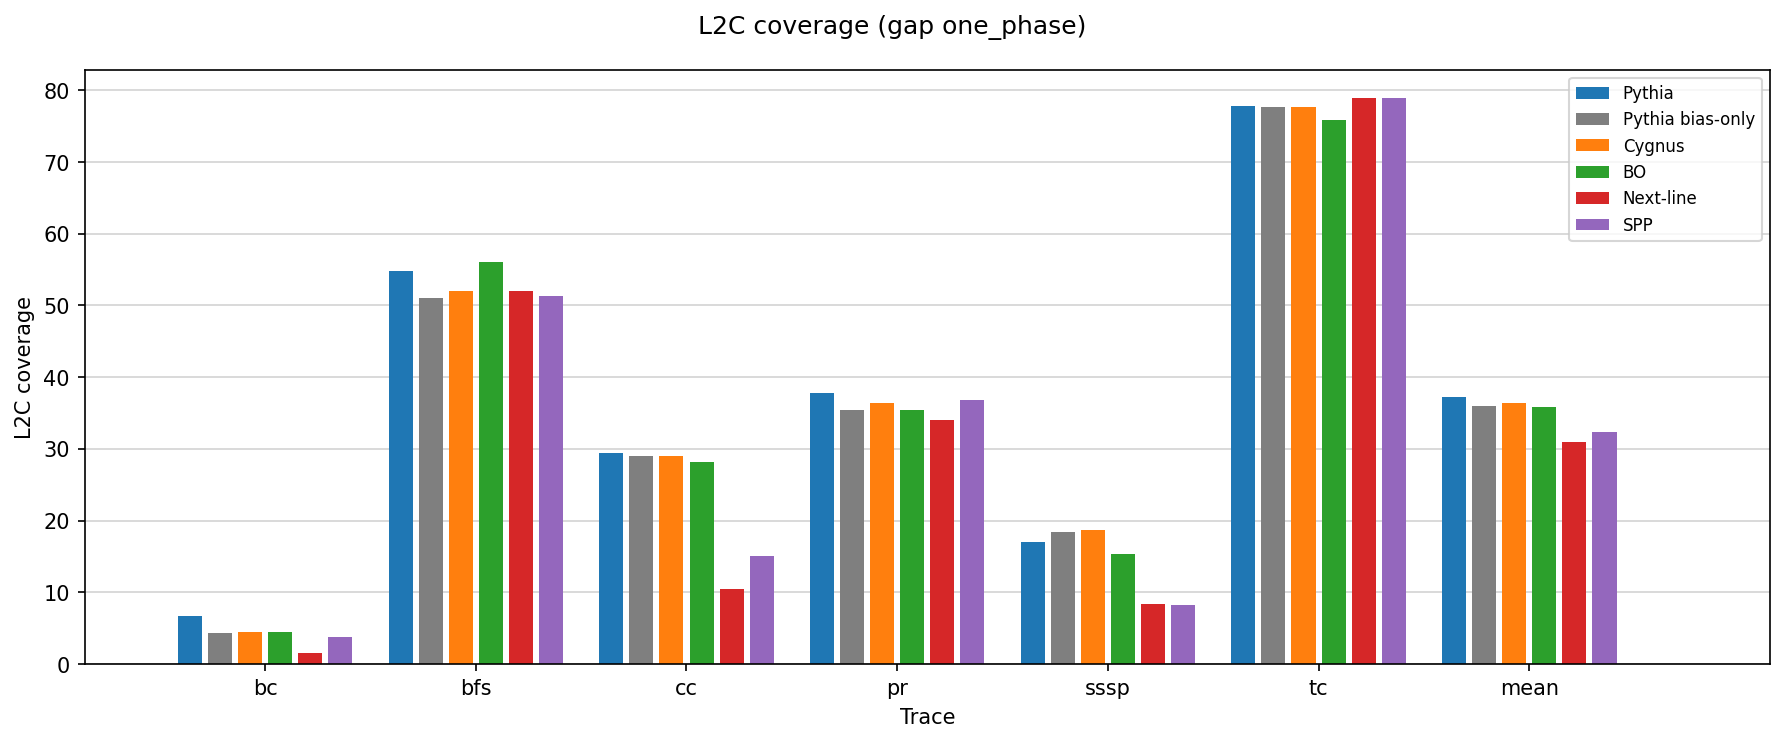

In [22]:
bias_df = {
    'Pythia': dfs['degree1_tuned_nozeroaction']['Delta_Path, PC_Delta'],
    # 'Pythia': dfs['degree1_baseline_pythia']['Delta_Path, PC_Delta'],
    'Pythia bias-only': dfs['degree1_featureless_tuned_nozeroaction']['pythia'],
    # 'Pythia bias-only': dfs['degree1_featureless']['pythia'],
    'Cygnus': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
    # 'Cygnus': dfs['degree1_featureless']['cygnus'],
    'BO': dfs['degree1_featureless_tuned_nozeroaction']['bo'],
    # 'BO': dfs['degree1_baseline']['bo'],
    'Next-line': dfs['degree1_baseline']['next_line'],
    'SPP': dfs['degree1_baseline']['spp_dev2'],
    #'Bingo': dfs['degree1_baseline']['bingo'],
}
bias_df_colors = {
    'Pythia': 'C0',
    'Pythia bias-only': 'C7',
    'Cygnus': 'C1',
    'BO': 'C2',
    'Next-line': 'C3',
    'SPP': 'C4'
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(bias_df, suites=suites, metrics=metrics, 
                      legend_kwargs=legend_kwargs, dpi=dpi, colors=bias_df_colors,figsize=(12,5))

## Tuned

=== spec06 one_phase ===


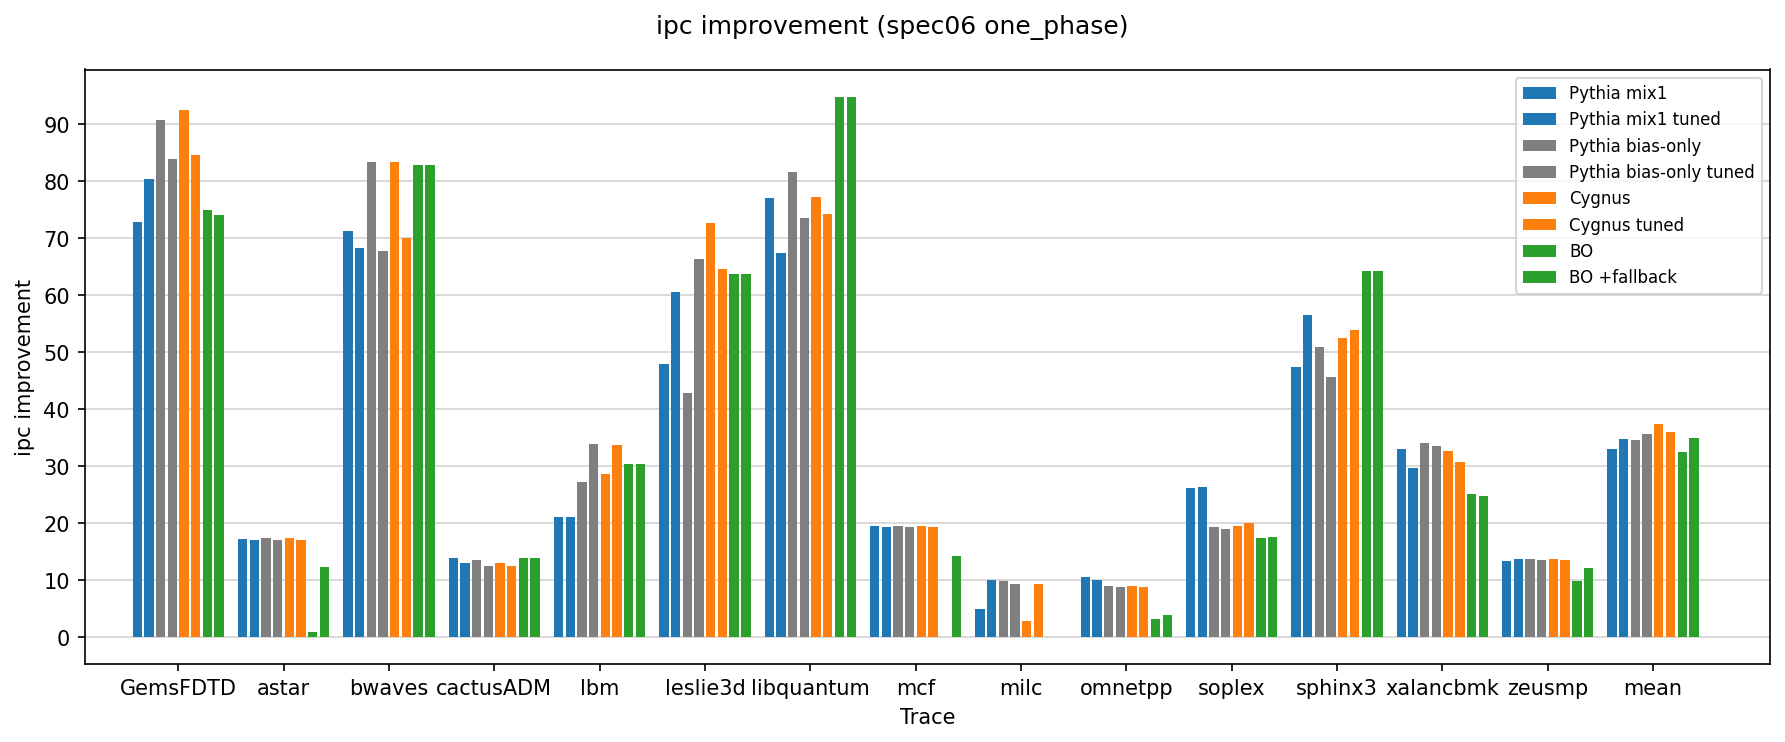

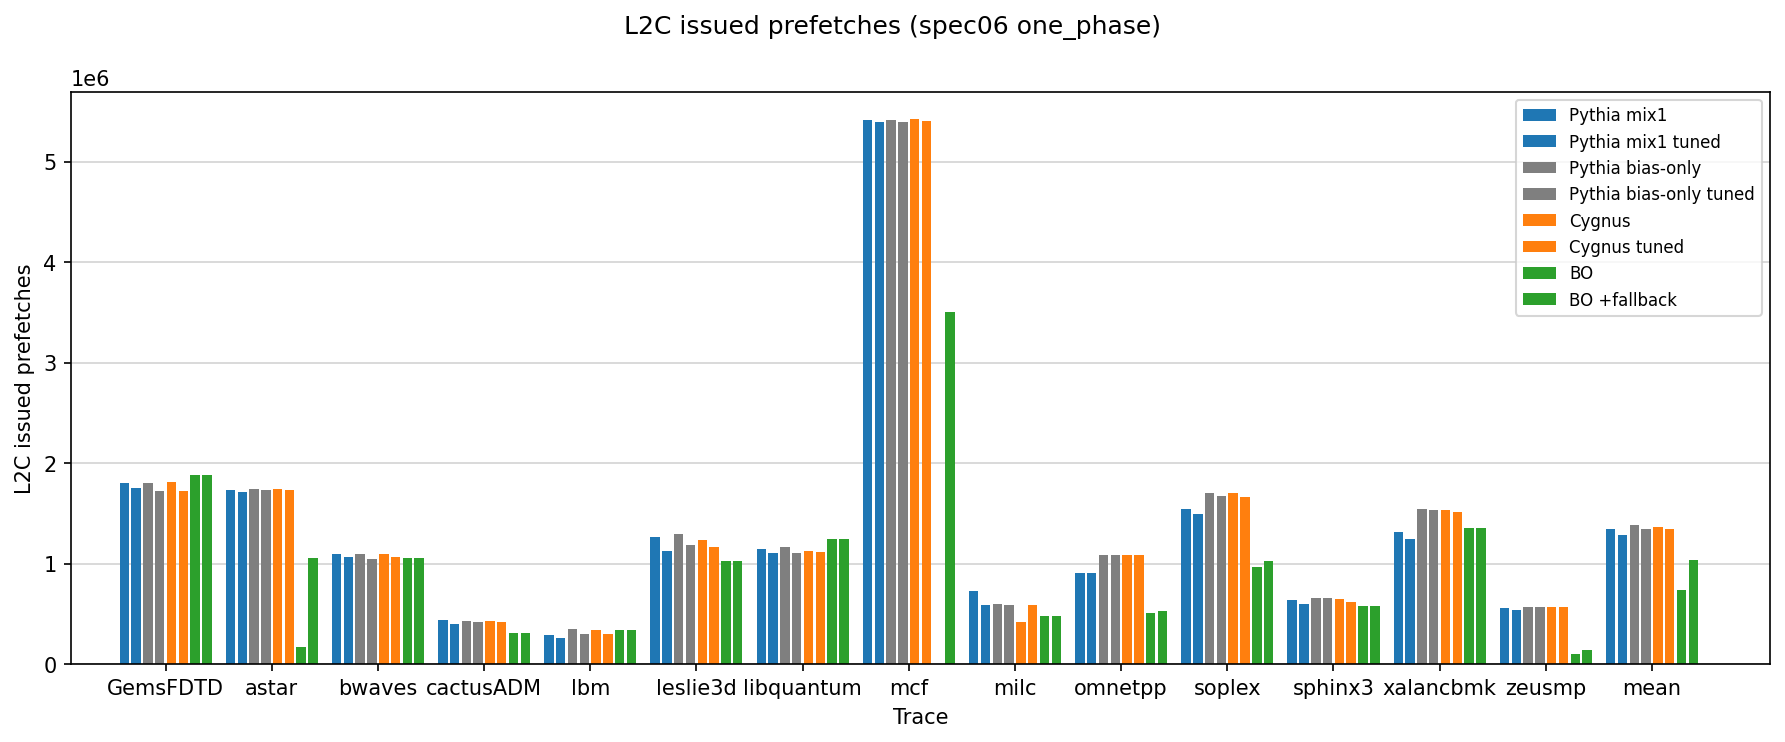

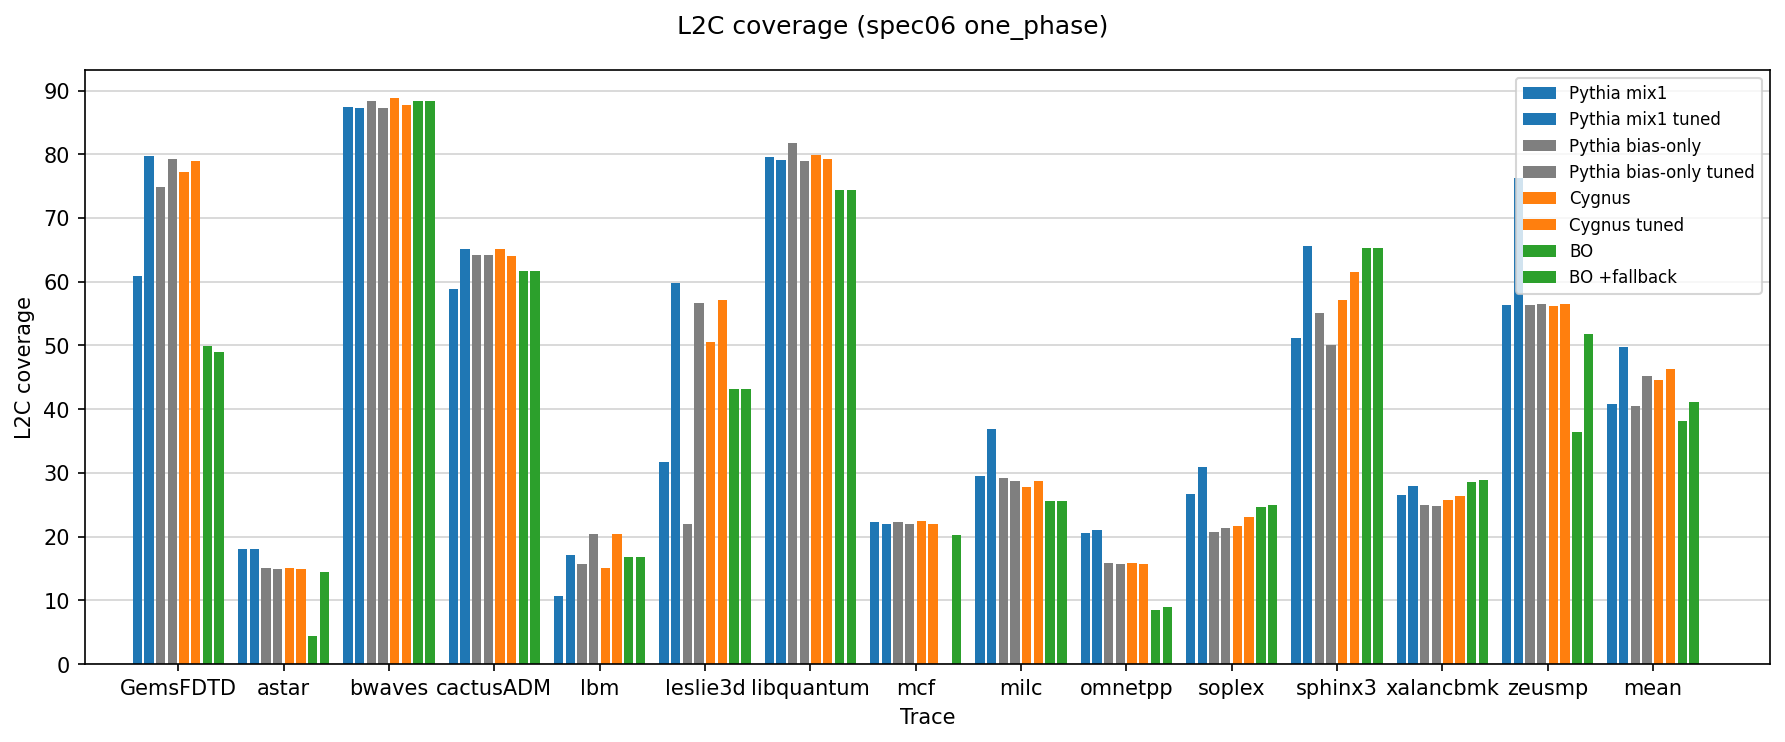

=== gap one_phase ===


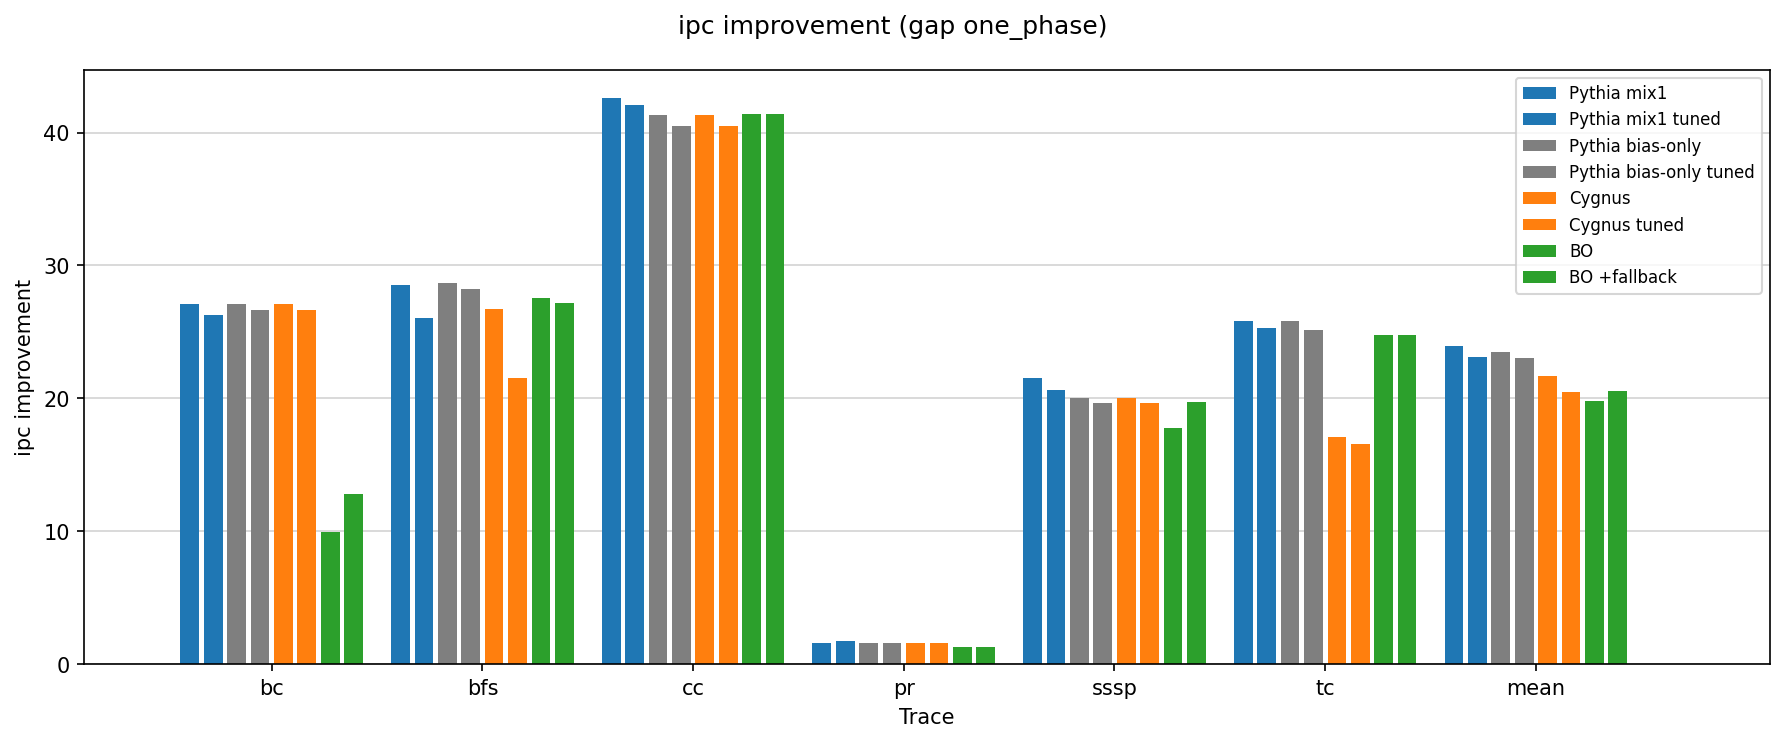

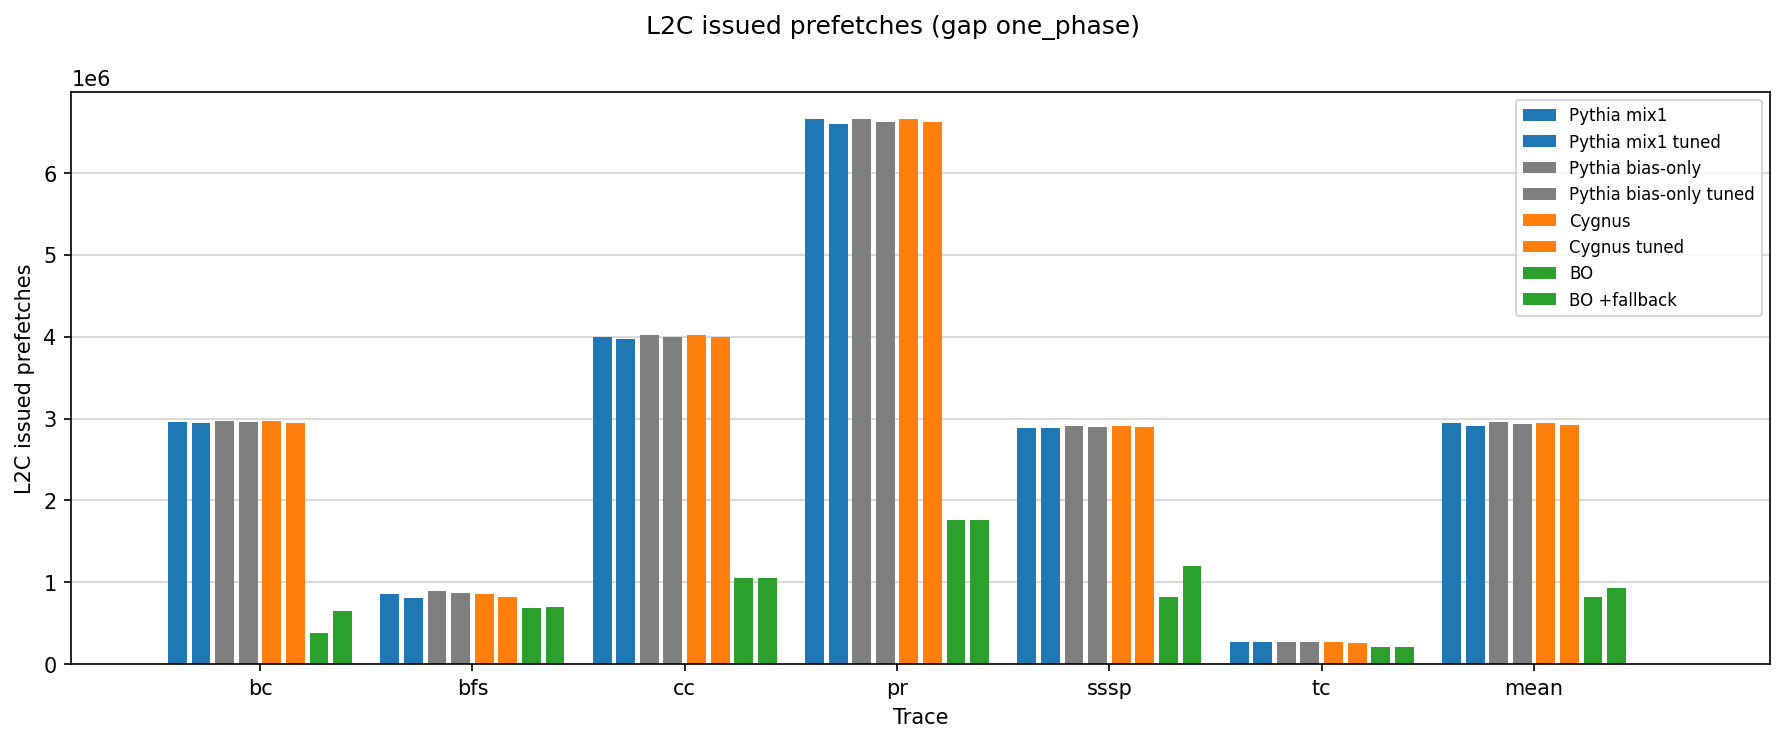

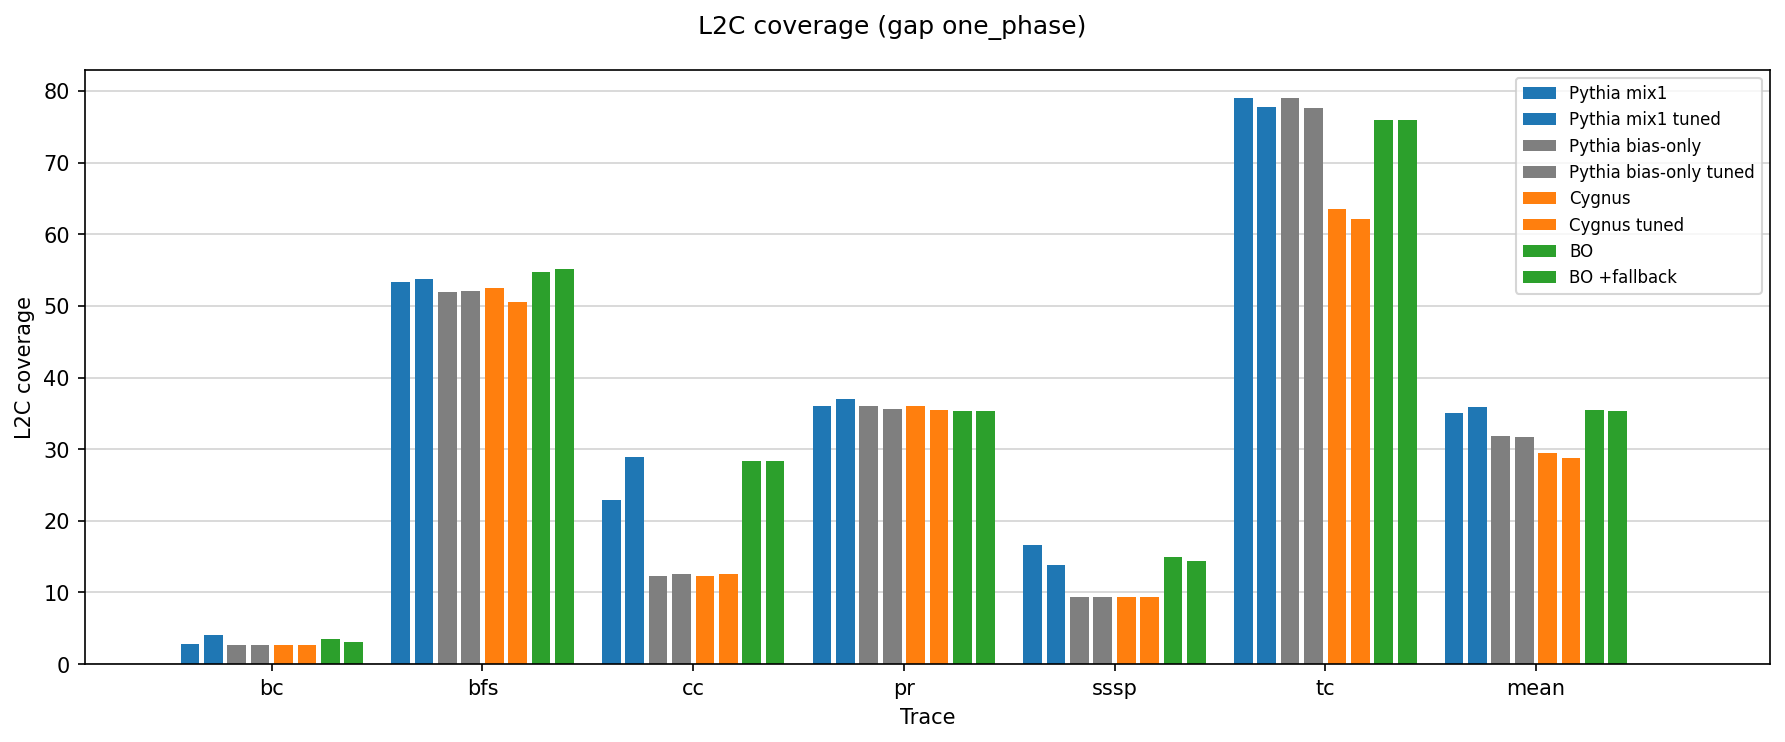

In [4]:
tuned_df = {
    'Pythia mix1': dfs['degree1_baseline_pythia']['Delta_Path, PC_Delta'], # (tiled max)
    'Pythia mix1 tuned': dfs['degree1_tuned']['Delta_Path, PC_Delta'],
    'Pythia bias-only': dfs['degree1_featureless']['pythia'],
    'Pythia bias-only tuned': dfs['degree1_featureless_tuned']['pythia'],
    'Cygnus': dfs['degree1_featureless']['cygnus'],
    'Cygnus tuned': dfs['degree1_featureless_tuned']['cygnus'],
    'BO': dfs['degree1_baseline']['bo'],
    'BO +fallback': dfs['degree1_featureless_tuned']['bo'],
    #'Next-line': dfs['degree1_baseline']['next_line'],
    #'SPP': dfs['degree1_baseline']['spp_dev2'],
    #'Bingo': dfs['degree1_baseline']['bingo'],
}
tuned_df_colors = {
    'Pythia mix1': 'C0',
    'Pythia mix1 tuned': 'C0',
    'Pythia bias-only': 'C7',
    'Pythia bias-only tuned': 'C7',
    'Cygnus': 'C1',
    'Cygnus tuned': 'C1',
    'Cygnus tuned ucb': 'C1',
    'BO': 'C2',
    'BO +fallback': 'C2'
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(tuned_df, suites=suites, metrics=metrics, colors=tuned_df_colors,
                      legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

## Action fallback

=== spec06 one_phase ===


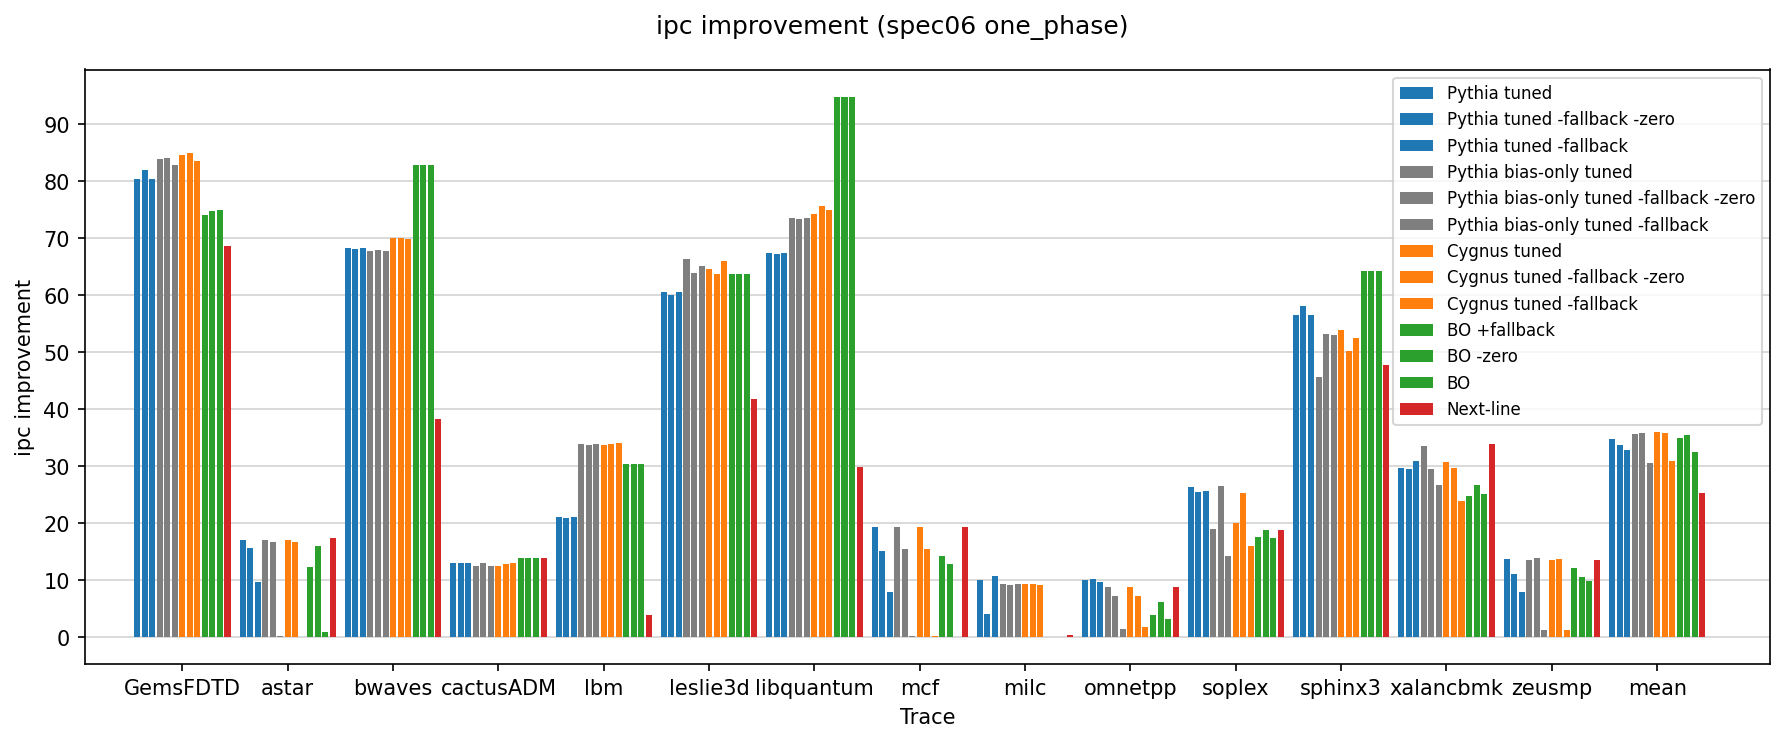

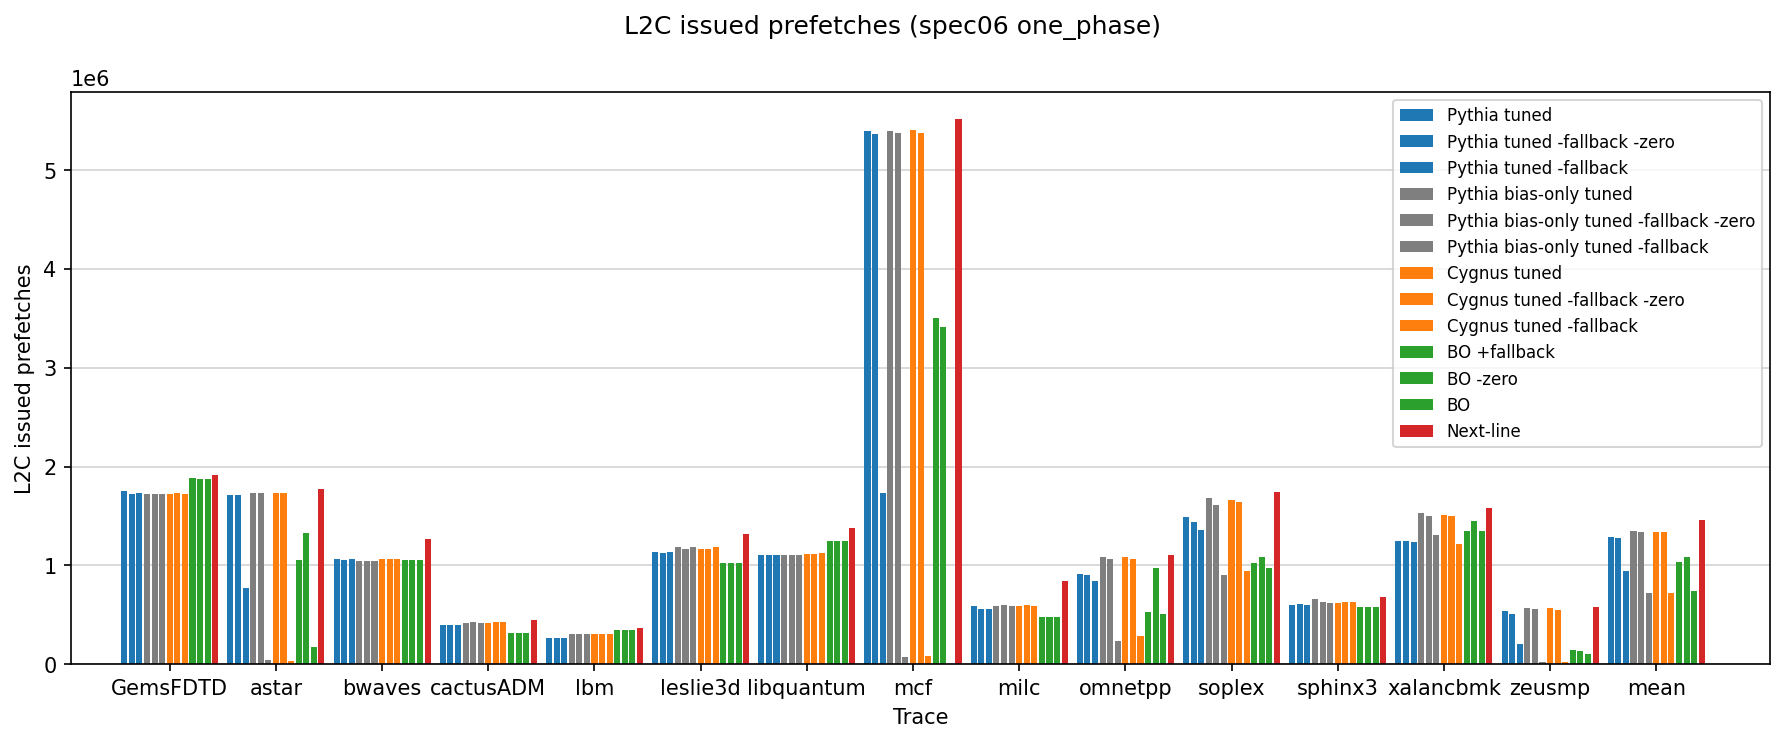

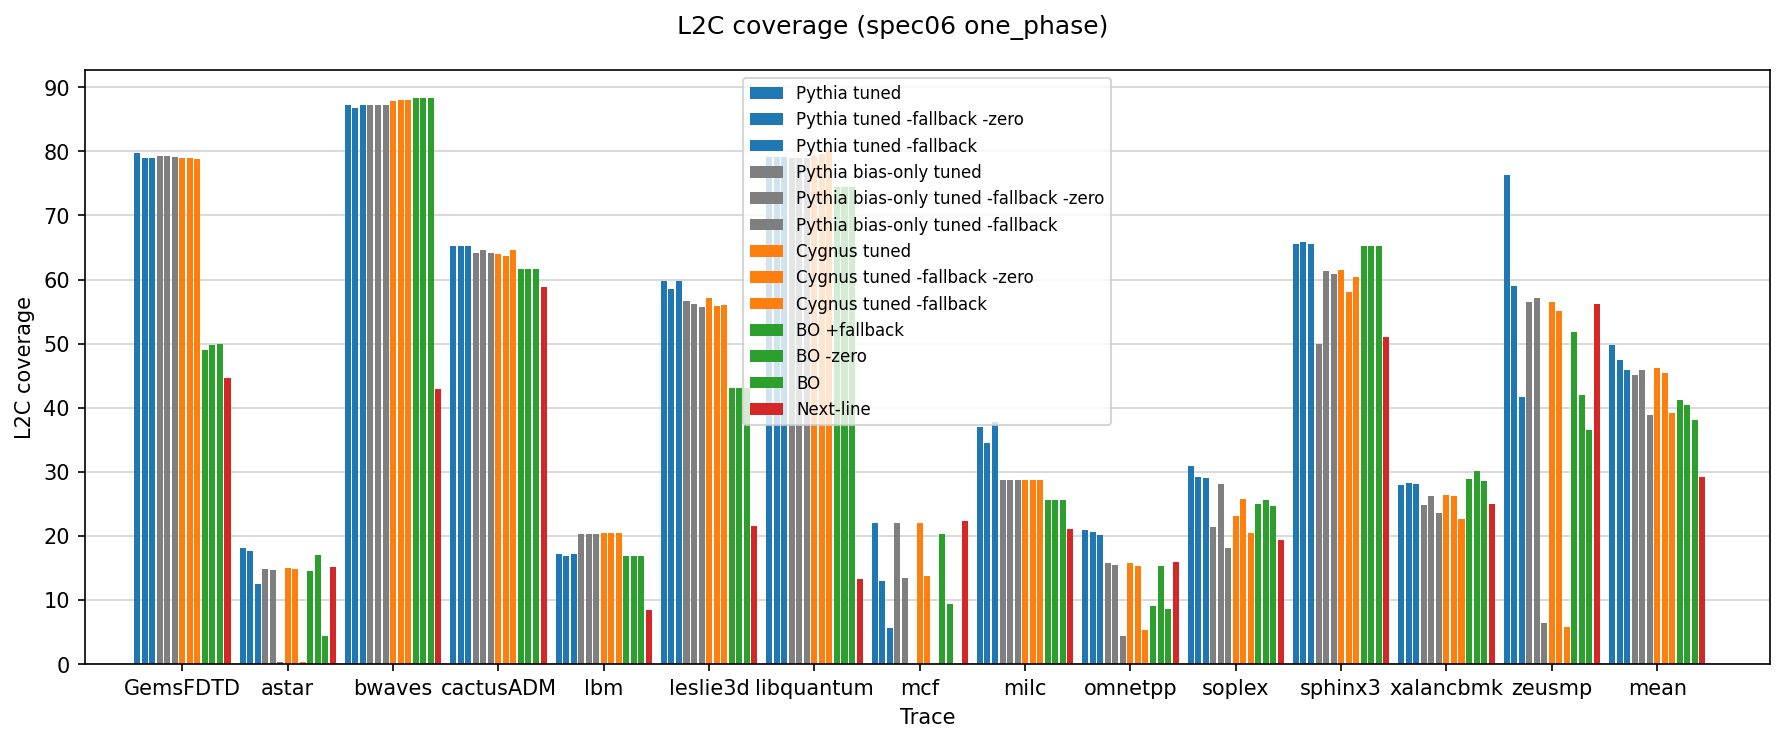

=== gap one_phase ===


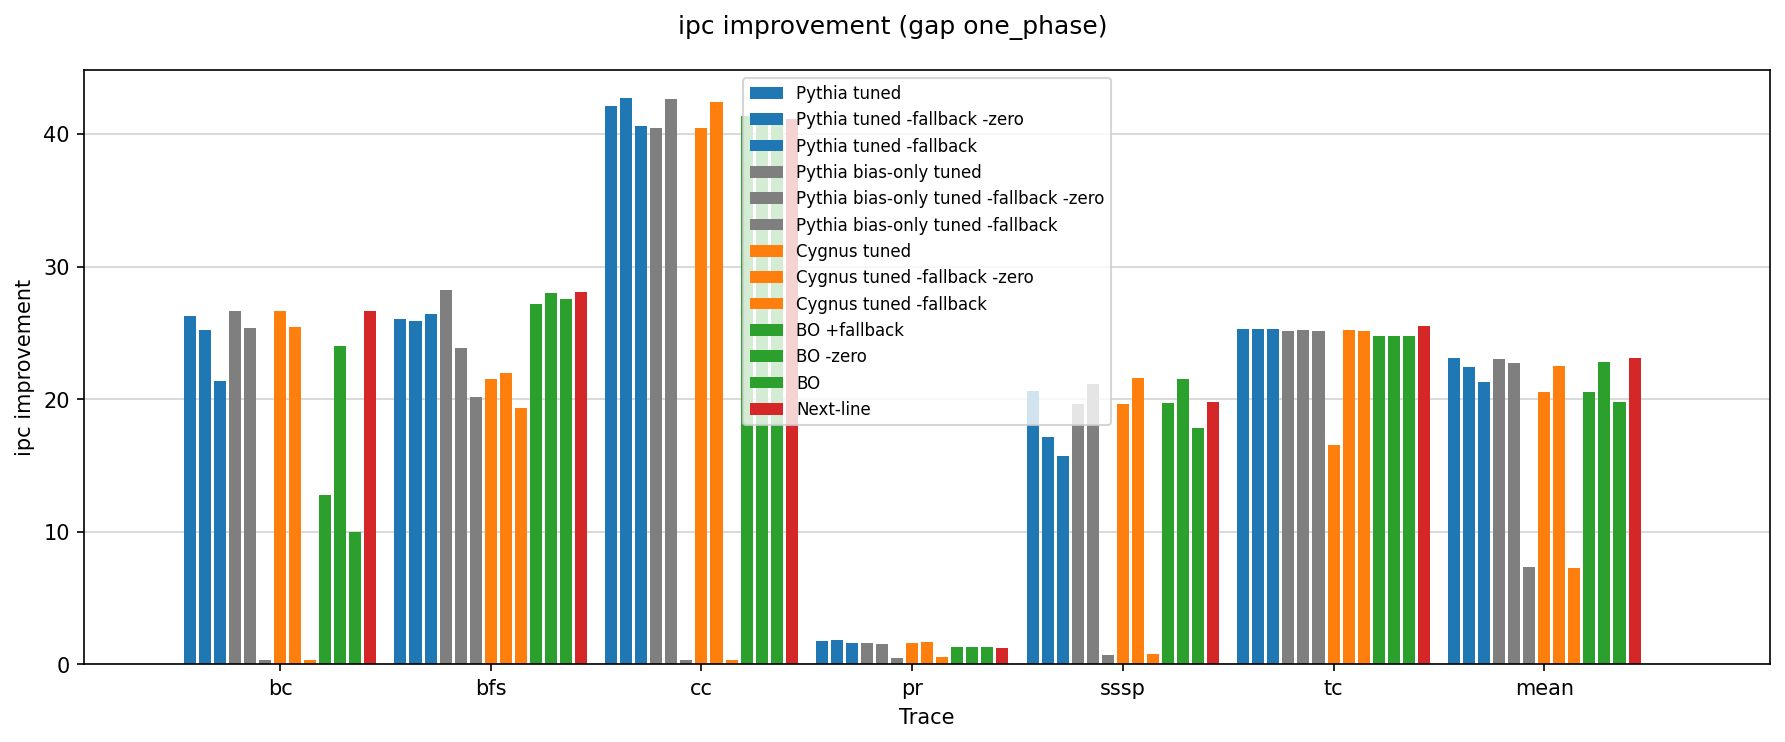

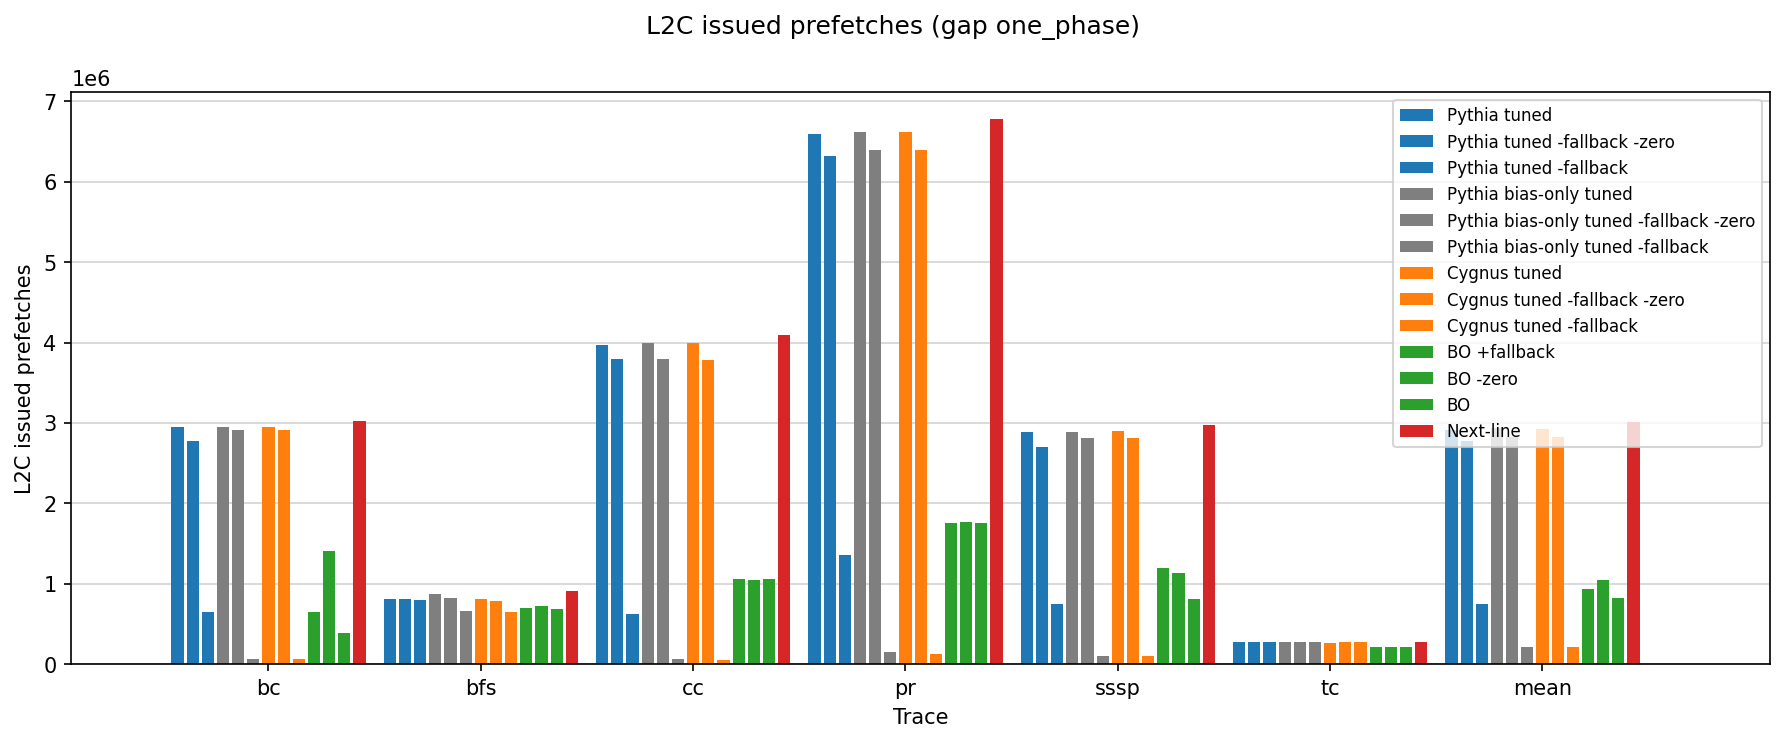

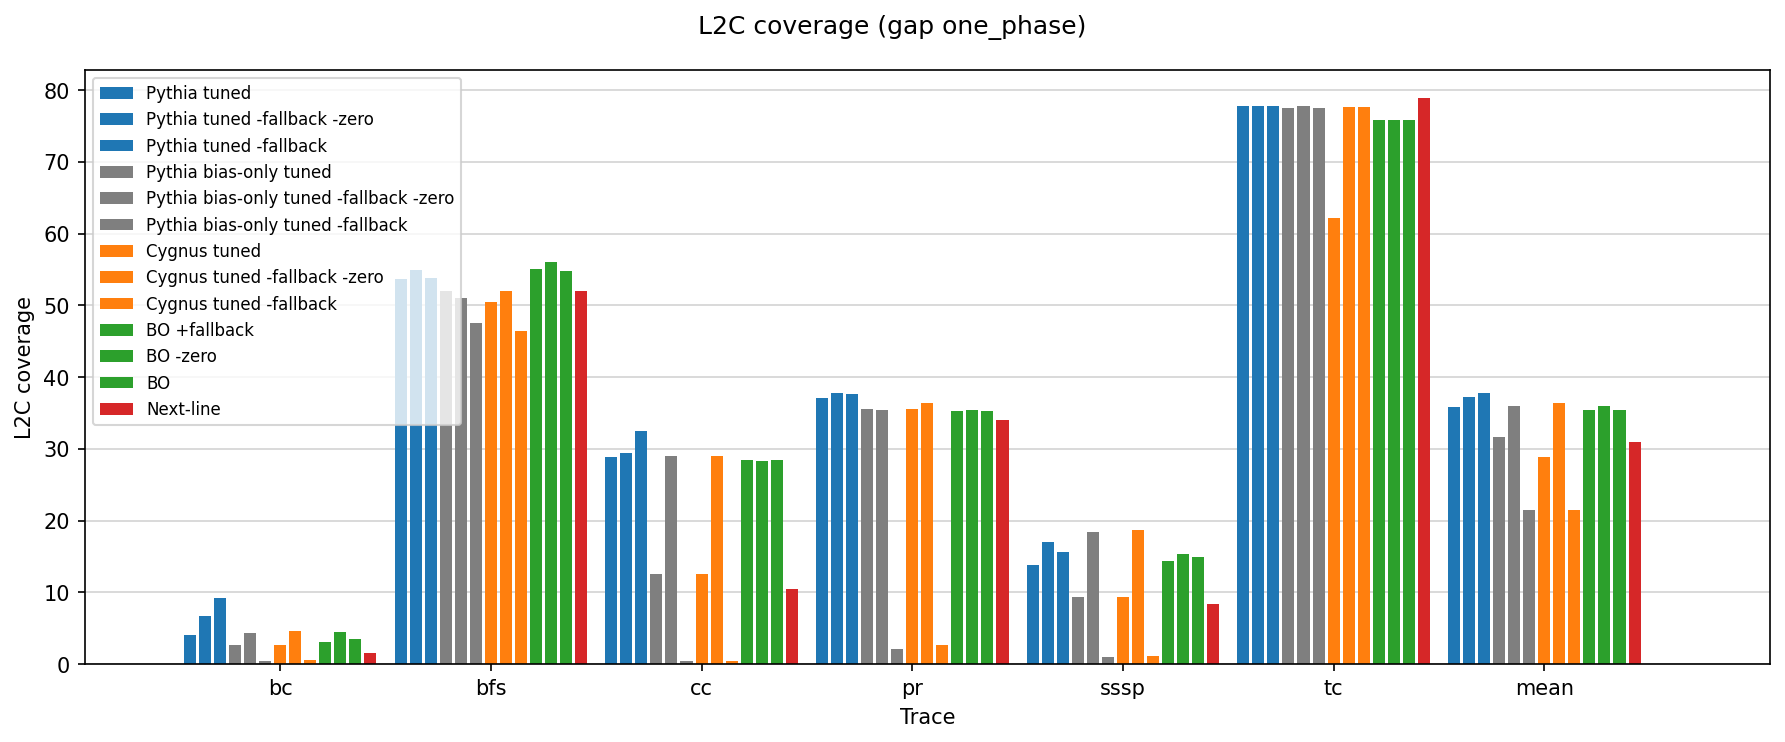

In [5]:
fallback_df = {
    # Pythia PC_Delta, Delta_Path
    'Pythia tuned': dfs['degree1_tuned']['Delta_Path, PC_Delta'],
    'Pythia tuned -fallback -zero': dfs['degree1_tuned_nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia tuned -fallback': dfs['degree1_tuned_nofallback']['Delta_Path, PC_Delta'],
    # Pythia bias-only
    'Pythia bias-only tuned': dfs['degree1_featureless_tuned']['pythia'],
    'Pythia bias-only tuned -fallback -zero': dfs['degree1_featureless_tuned_nozeroaction']['pythia'],
    'Pythia bias-only tuned -fallback': dfs['degree1_featureless_tuned_nofallback']['pythia'],
    # Cygnus
    'Cygnus tuned': dfs['degree1_featureless_tuned']['cygnus'],
    'Cygnus tuned -fallback -zero': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
    'Cygnus tuned -fallback': dfs['degree1_featureless_tuned_nofallback']['cygnus'],
    # BO
    'BO +fallback': dfs['degree1_featureless_tuned']['bo'],
    'BO -zero': dfs['degree1_featureless_tuned_nozeroaction']['bo'],
    'BO': dfs['degree1_baseline']['bo'],
    # Next-line
    'Next-line': dfs['degree1_baseline']['next_line']
}
fallback_df_colors = {
    'Pythia tuned': 'C0',
    'Pythia tuned -fallback': 'C0',
    'Pythia tuned -fallback -zero': 'C0',
    'Pythia bias-only tuned': 'C7',
    'Pythia bias-only tuned -fallback': 'C7',
    'Pythia bias-only tuned -fallback -zero': 'C7',
    'Cygnus tuned': 'C1',
    'Cygnus tuned -fallback': 'C1',
    'Cygnus tuned -fallback -zero': 'C1',
    'BO +fallback': 'C2',
    'BO': 'C2',
    'BO -zero': 'C2',
    'Next-line': 'C3',
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
plots.plot_everything(fallback_df, suites=suites, metrics=metrics, colors=fallback_df_colors,
                      legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

## Action selection

In [7]:
# selection_df = {
#     'Pythia tuned': dfs['degree1_baseline_pythia']['Delta_Path, PC_Delta'],
#     'Cygnus tuned': dfs['degree1_featureless_tuned']['cygnus'],
#     'Cygnus tuned -fallback -zero': dfs['degree1_featureless_tuned_nozeroaction']['cygnus'],
#     #'Cygnus tuned ucb': dfs['degree1_featureless_tuned_ucb']['cygnus'],
#     'Cygnus tuned acc': dfs['degree1_featureless_tuned_acc']['cygnus'],
#     'Cygnus tuned timely acc': dfs['degree1_featureless_tuned_timelyacc']['cygnus'],
#     'BO -zero': dfs['degree1_featureless_tuned_nozeroaction']['bo'],
#     'BO +fallback': dfs['degree1_featureless_tuned']['bo'],
#     'BO': dfs['degree1_baseline']['bo'],
#     'Next-line': dfs['degree1_baseline']['next_line']
# }
# selection_df_colors = {
#     'Pythia tuned': 'C0',
#     # 'Pythia tuned -fallback': 'C0',
#     # 'Pythia bias-only tuned': 'C7',
#     # 'Pythia bias-only tuned -fallback': 'C7',
#     # 'Pythia bias-only tuned -fallback -zero': 'C7',
#     'Cygnus tuned': 'C1',
#     'Cygnus tuned -fallback -zero': 'C1',
#     'Cygnus tuned ucb': 'C1',
#     'Cygnus tuned acc': 'C1',
#     'Cygnus tuned timely acc': 'C1',
#     'BO -zero': 'C2',
#     'BO +fallback': 'C2',
#     'BO': 'C2',
#     'Next-line': 'C3',
# }
# legend_kwargs = {
#     'fontsize': 8,
#     'ncol': 1,
#     #'loc': 'upper left',
#     #'bbox_to_anchor': (0, 1),
# }
# plots.plot_everything(selection_df, suites=suites, metrics=metrics, colors=selection_df_colors,
#                       legend_kwargs=legend_kwargs, dpi=dpi, figsize=(12,5))

# Tables

## Baseline comparison

In [15]:
tables.table_everything(bias_df, suites=suites, metrics=metrics)

=== spec06 one_phase ===
ipc_improvement


,Pythia mix1,Pythia bias-only,Cygnus,BO,Next-line,SPP
run_name,,,,,,
GemsFDTD_109B,72.791363,90.676677,92.033163,74.984643,68.612272,69.458016
astar_313B,17.149669,17.304808,17.283606,0.817587,17.311014,17.052965
bwaves_1861B,71.208588,83.290831,84.772260,82.893190,38.275947,37.136965
cactusADM_734B,13.807998,13.492886,12.762942,13.902554,13.785162,11.497561
lbm_94B,21.112855,27.269076,28.559726,30.429635,3.835905,3.754829
leslie3d_1116B,52.796202,41.879483,70.080692,58.366266,41.380916,40.427960
leslie3d_94B,43.057108,43.584717,79.123965,69.044722,42.020959,38.765038
libquantum_1210B,77.107728,81.587684,80.424390,94.844144,29.765558,29.433043
mcf_46B,19.457203,19.538401,19.510515,-0.007382,19.305469,11.859847


L2C_issued_prefetches


,Pythia mix1,Pythia bias-only,Cygnus,BO,Next-line,SPP
run_name,,,,,,
GemsFDTD_109B,1.803249e+06,1.801673e+06,1816740.0,1.878264e+06,1.918797e+06,1887531.0
astar_313B,1.729843e+06,1.741121e+06,1740666.0,1.708660e+05,1.769109e+06,1727309.0
bwaves_1861B,1.090913e+06,1.098685e+06,1102058.0,1.051469e+06,1.262387e+06,1239375.0
cactusADM_734B,4.412050e+05,4.330600e+05,419488.0,3.121560e+05,4.507450e+05,439088.0
lbm_94B,2.884250e+05,3.463080e+05,342418.0,3.413650e+05,3.700000e+05,358055.0
leslie3d_1116B,1.158694e+06,1.210024e+06,1142334.0,1.001511e+06,1.231776e+06,1207832.0
leslie3d_94B,1.379578e+06,1.378003e+06,1279947.0,1.040797e+06,1.411698e+06,1384369.0
libquantum_1210B,1.142685e+06,1.161863e+06,1147807.0,1.248391e+06,1.380930e+06,1353515.0
mcf_46B,5.413218e+06,5.419218e+06,5424685.0,0.000000e+00,5.518152e+06,4083099.0


L2C_coverage


,Pythia mix1,Pythia bias-only,Cygnus,BO,Next-line,SPP
run_name,,,,,,
GemsFDTD_109B,60.891795,74.924350,76.923430,49.980869,44.573168,44.477487
astar_313B,18.088402,15.102974,15.098508,4.365225,15.099966,14.980463
bwaves_1861B,87.336303,88.401515,89.006280,88.355224,42.849237,42.088824
cactusADM_734B,58.902909,64.141802,64.447238,61.621290,58.889408,51.685321
lbm_94B,10.635308,15.710089,15.025679,16.848431,8.478322,7.439211
leslie3d_1116B,39.276735,19.081158,49.722676,35.900931,19.214877,19.350183
leslie3d_94B,24.143215,24.828182,64.416189,50.352046,23.950168,24.010077
libquantum_1210B,79.563326,81.786741,81.165642,74.462884,13.266987,13.452368
mcf_46B,22.292755,22.368519,22.392815,0.002097,22.280100,10.159901


=== gap one_phase ===
ipc_improvement


,Pythia mix1,Pythia bias-only,Cygnus,BO,Next-line,SPP
run_name,,,,,,
bc,27.115018,27.117960,27.128866,9.945958,26.645225,22.035755
bfs,28.493352,28.670511,27.501932,27.551275,28.041139,27.056457
cc,42.615344,41.308715,41.307292,41.380629,41.113361,41.076060
pr,1.582309,1.583514,1.582309,1.264562,1.206315,1.608821
sssp,21.558318,19.994803,20.006410,17.786825,19.750704,17.196241
tc,25.851008,25.826945,17.090054,24.792508,25.478992,25.874816
mean,23.913095,23.481634,21.827315,19.765790,23.100703,21.885914


L2C_issued_prefetches


,Pythia mix1,Pythia bias-only,Cygnus,BO,Next-line,SPP
run_name,,,,,,
bc,2964316.0,2966924.0,2.966934e+06,3.826460e+05,3.024960e+06,1454247.0
bfs,860563.0,888393.0,8.551400e+05,6.844050e+05,9.060400e+05,861581.0
cc,4000865.0,4020517.0,4.020555e+06,1.053590e+06,4.094913e+06,1804808.0
pr,6660669.0,6660989.0,6.661020e+06,1.760746e+06,6.781389e+06,3264415.0
sssp,2880618.0,2909477.0,2.912349e+06,8.148960e+05,2.972597e+06,1292717.0
tc,272921.0,272921.0,2.638080e+05,2.133560e+05,2.777290e+05,271715.0
mean,2939992.0,2953203.5,2.946634e+06,8.182732e+05,3.009605e+06,1491580.5


L2C_coverage


,Pythia mix1,Pythia bias-only,Cygnus,BO,Next-line,SPP
run_name,,,,,,
bc,2.756694,2.691920,2.690549,3.551799,1.502962,3.828437
bfs,53.287236,51.973109,52.824816,54.759875,52.048343,51.275458
cc,22.833556,12.343097,12.342244,28.379627,10.518094,15.135445
pr,36.000045,35.997207,35.999478,35.293936,34.037635,36.796413
sssp,16.683126,9.408473,9.407277,14.980052,8.431565,8.195347
tc,79.037607,78.987793,63.487786,75.874698,78.923273,78.949366
mean,35.099711,31.900267,29.458692,35.473331,30.910312,32.363411


## Tuned

In [ ]:
tables.table_everything(tuned_df, suites=suites, metrics=metrics)

## Action fallback

In [16]:
tables.table_everything(fallback_df, suites=suites, metrics=metrics)

=== spec06 one_phase ===
ipc_improvement


,Pythia tuned,Pythia tuned -fallback -zero,Pythia tuned -fallback,Pythia bias-only tuned,Pythia bias-only tuned -fallback -zero,Pythia bias-only tuned -fallback,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned -fallback,BO +fallback,BO -zero,BO,Next-line
run_name,,,,,,,,,,,,,
GemsFDTD_109B,80.333904,81.891148,80.386585,83.937775,84.117582,82.914461,84.554693,85.428506,84.303085,74.003230,74.688287,74.984643,68.612272
astar_313B,16.938161,15.621542,9.638317,17.018834,16.626330,0.166517,17.034348,16.664081,0.137557,12.254491,15.916824,0.817587,17.311014
bwaves_1861B,68.342317,68.137852,68.342317,67.653659,67.875685,67.653659,70.462229,69.976781,69.817474,82.893190,82.893190,82.893190,38.275947
cactusADM_734B,12.965596,12.960088,12.965596,12.496715,12.925432,12.496715,12.398946,12.745041,12.800352,13.902554,13.902554,13.902554,13.785162
lbm_94B,21.028292,20.901447,21.028292,33.807946,33.629305,33.807946,34.069036,33.921049,33.935848,30.429635,30.429635,30.429635,3.835905
leslie3d_1116B,55.234762,56.042566,55.234762,62.810452,58.655309,62.183142,58.253931,58.156742,61.842349,58.366266,58.366266,58.366266,41.380916
leslie3d_94B,65.721420,63.958061,65.721420,70.016032,69.049808,68.178935,70.875463,70.609751,70.616108,69.044722,69.044722,69.044722,42.020959
libquantum_1210B,67.378682,67.222444,67.378682,73.532933,73.305369,73.532933,75.502891,74.590936,75.738947,94.844144,94.844144,94.844144,29.765558
mcf_46B,19.319412,15.022473,7.963157,19.332535,15.505561,0.149273,19.335816,15.680260,0.160756,14.289229,12.788294,-0.007382,19.305469


L2C_issued_prefetches


,Pythia tuned,Pythia tuned -fallback -zero,Pythia tuned -fallback,Pythia bias-only tuned,Pythia bias-only tuned -fallback -zero,Pythia bias-only tuned -fallback,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned -fallback,BO +fallback,BO -zero,BO,Next-line
run_name,,,,,,,,,,,,,
GemsFDTD_109B,1.756063e+06,1724893.0,1729751.0,1.720710e+06,1.717293e+06,1.717252e+06,1725681.0,1722527.0,1722354.0,1.879733e+06,1878557.0,1.878264e+06,1.918797e+06
astar_313B,1.712435e+06,1707888.0,765334.0,1.732833e+06,1.730513e+06,3.716200e+04,1732833.0,1729336.0,36643.0,1.056435e+06,1326253.0,1.708660e+05,1.769109e+06
bwaves_1861B,1.064259e+06,1055808.0,1064259.0,1.047518e+06,1.046881e+06,1.047518e+06,1062349.0,1060871.0,1063245.0,1.051469e+06,1051469.0,1.051469e+06,1.262387e+06
cactusADM_734B,3.960750e+05,396150.0,396075.0,4.203190e+05,4.246940e+05,4.203190e+05,417952.0,422048.0,423750.0,3.121560e+05,312156.0,3.121560e+05,4.507450e+05
lbm_94B,2.608900e+05,259006.0,260890.0,3.032130e+05,3.018580e+05,3.032130e+05,307131.0,305414.0,306075.0,3.413650e+05,341365.0,3.413650e+05,3.700000e+05
leslie3d_1116B,1.044663e+06,1060286.0,1044663.0,1.098179e+06,1.073212e+06,1.093561e+06,1071870.0,1072044.0,1092186.0,1.001511e+06,1001511.0,1.001511e+06,1.231776e+06
leslie3d_94B,1.216023e+06,1195979.0,1216023.0,1.269374e+06,1.265328e+06,1.270295e+06,1266217.0,1262249.0,1266115.0,1.040797e+06,1040797.0,1.040797e+06,1.411698e+06
libquantum_1210B,1.104251e+06,1104530.0,1104251.0,1.106734e+06,1.105539e+06,1.106734e+06,1119482.0,1114425.0,1131480.0,1.248391e+06,1248391.0,1.248391e+06,1.380930e+06
mcf_46B,5.396538e+06,5371091.0,1731015.0,5.396357e+06,5.379833e+06,7.663700e+04,5402991.0,5380244.0,75084.0,3.506915e+06,3408128.0,0.000000e+00,5.518152e+06


L2C_coverage


,Pythia tuned,Pythia tuned -fallback -zero,Pythia tuned -fallback,Pythia bias-only tuned,Pythia bias-only tuned -fallback -zero,Pythia bias-only tuned -fallback,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned -fallback,BO +fallback,BO -zero,BO,Next-line
run_name,,,,,,,,,,,,,
GemsFDTD_109B,79.721370,79.013859,78.949915,79.256065,79.289524,79.108654,79.055828,79.215193,79.264886,49.000042,49.804748,49.980869,44.573168
astar_313B,18.098657,17.660799,12.556909,14.895599,14.646886,0.336221,14.919208,14.881106,0.320907,14.500401,16.990726,4.365225,15.099966
bwaves_1861B,87.205336,86.824734,87.205336,87.290012,87.253032,87.290012,88.291366,88.067554,87.703993,88.355224,88.355224,88.355224,42.849237
cactusADM_734B,65.200205,65.208836,65.200205,64.124096,64.550821,64.124096,63.829505,63.130322,64.530901,61.621290,61.621290,61.621290,58.889408
lbm_94B,17.183003,16.940973,17.183003,20.359444,20.247312,20.359444,20.603635,20.444556,20.514334,16.848431,16.848431,16.848431,8.478322
leslie3d_1116B,56.632394,55.509459,56.632394,55.992882,55.631271,56.132590,55.699249,55.559396,56.462521,35.900931,35.900931,35.900931,19.214877
leslie3d_94B,63.058461,61.397841,63.058461,57.386425,56.755041,55.297515,58.113588,57.980896,58.176548,50.352046,50.352046,50.352046,23.950168
libquantum_1210B,79.106535,79.071052,79.106535,78.972351,78.985458,78.972351,79.588382,79.360638,80.504570,74.462884,74.462884,74.462884,13.266987
mcf_46B,21.994789,13.019258,5.631402,22.003484,13.360278,0.073714,22.039729,14.009988,0.068906,20.323596,9.378388,0.002097,22.280100


=== gap one_phase ===
ipc_improvement


,Pythia tuned,Pythia tuned -fallback -zero,Pythia tuned -fallback,Pythia bias-only tuned,Pythia bias-only tuned -fallback -zero,Pythia bias-only tuned -fallback,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned -fallback,BO +fallback,BO -zero,BO,Next-line
run_name,,,,,,,,,,,,,
bc,26.255405,25.201228,21.374515,26.672748,25.378309,0.288211,26.641244,25.423142,0.300847,12.781503,24.021901,9.945958,26.645225
bfs,26.014704,25.887878,26.440560,28.195113,23.871153,20.180330,21.727206,24.373898,21.968769,27.144839,28.010423,27.551275,28.041139
cc,42.096928,42.728510,40.617073,40.461074,42.652170,0.301724,40.468186,42.593532,0.301566,41.380629,40.824439,41.380629,41.113361
pr,1.742187,1.819314,1.598377,1.561420,1.544951,0.461557,1.561019,1.754640,0.557564,1.264562,1.268177,1.264562,1.206315
sssp,20.610680,17.156048,15.718307,19.657326,21.109273,0.655724,19.634978,21.360301,0.887176,19.698558,21.479146,17.786825,19.750704
tc,25.269940,25.299860,25.269940,25.141479,25.235693,25.141479,16.470283,25.204500,25.218378,24.792508,24.792508,24.792508,25.478992
mean,23.073608,22.398130,21.254523,23.035375,22.698467,7.342545,20.519371,22.859740,7.678738,20.534186,22.818606,19.765790,23.100703


L2C_issued_prefetches


,Pythia tuned,Pythia tuned -fallback -zero,Pythia tuned -fallback,Pythia bias-only tuned,Pythia bias-only tuned -fallback -zero,Pythia bias-only tuned -fallback,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned -fallback,BO +fallback,BO -zero,BO,Next-line
run_name,,,,,,,,,,,,,
bc,2.948338e+06,2.775261e+06,6.534620e+05,2.952268e+06,2.906168e+06,57755.0,2.952142e+06,2906586.0,57784.000000,6.435800e+05,1400924.0,3.826460e+05,3.024960e+06
bfs,8.044290e+05,8.068330e+05,7.918030e+05,8.727210e+05,8.219870e+05,661306.0,8.093160e+05,816152.0,672701.000000,7.006490e+05,722695.0,6.844050e+05,9.060400e+05
cc,3.971503e+06,3.794581e+06,6.218680e+05,3.998163e+06,3.790330e+06,58357.0,3.998140e+06,3790844.0,55466.000000,1.053590e+06,1041717.0,1.053590e+06,4.094913e+06
pr,6.595621e+06,6.327028e+06,1.362748e+06,6.623494e+06,6.390779e+06,144996.0,6.623438e+06,6376109.0,141441.000000,1.760746e+06,1764707.0,1.760746e+06,6.781389e+06
sssp,2.886802e+06,2.701462e+06,7.475750e+05,2.892958e+06,2.807624e+06,97587.0,2.896233e+06,2811040.0,109442.000000,1.196020e+06,1130117.0,8.148960e+05,2.972597e+06
tc,2.707860e+05,2.709960e+05,2.707860e+05,2.704580e+05,2.708800e+05,270458.0,2.614290e+05,270785.0,270660.000000,2.133560e+05,213356.0,2.133560e+05,2.777290e+05
mean,2.912913e+06,2.779360e+06,7.413737e+05,2.935010e+06,2.831295e+06,215076.5,2.923450e+06,2828586.0,217915.666667,9.279902e+05,1045586.0,8.182732e+05,3.009605e+06


L2C_coverage


,Pythia tuned,Pythia tuned -fallback -zero,Pythia tuned -fallback,Pythia bias-only tuned,Pythia bias-only tuned -fallback -zero,Pythia bias-only tuned -fallback,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned -fallback,BO +fallback,BO -zero,BO,Next-line
run_name,,,,,,,,,,,,,
bc,4.118505,6.683800,9.149878,2.650351,4.348549,0.481558,2.661954,4.311822,0.612203,3.120215,4.515555,3.551799,1.502962
bfs,53.705480,54.872603,53.791974,52.049333,51.051116,47.500746,50.697836,53.056088,48.147415,55.096945,56.068062,54.759875,52.048343
cc,28.911635,29.454526,32.435734,12.582639,29.049492,0.454650,12.569942,29.020683,0.451983,28.379627,28.242090,28.379627,10.518094
pr,37.022343,37.837192,37.679571,35.536959,35.382365,2.169040,35.539103,36.999006,2.862346,35.293936,35.433139,35.293936,34.037635
sssp,13.833135,17.053386,15.683408,9.414112,18.382186,1.017573,9.424022,18.467019,1.229272,14.391771,15.286409,14.980052,8.431565
tc,77.798915,77.769028,77.798915,77.553170,77.731549,77.553170,62.073088,77.680787,77.724907,75.874698,75.874698,75.874698,78.923273
mean,35.898336,37.278422,37.756580,31.631094,35.990876,21.529456,28.827657,36.589234,21.838021,35.359532,35.903326,35.473331,30.910312


## Action selection

In [17]:
tables.table_everything(selection_df, suites=suites, metrics=metrics)

=== spec06 one_phase ===
ipc_improvement


,Pythia tuned,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned acc,Cygnus tuned timely acc,BO -zero,BO +fallback,BO,Next-line
run_name,,,,,,,,,
GemsFDTD_109B,72.791363,84.554693,85.428506,69.561141,69.642298,74.688287,74.003230,74.984643,68.612272
astar_313B,17.149669,17.034348,16.664081,17.338939,17.337388,15.916824,12.254491,0.817587,17.311014
bwaves_1861B,71.208588,70.462229,69.976781,38.623412,87.696233,82.893190,82.893190,82.893190,38.275947
cactusADM_734B,13.807998,12.398946,12.745041,13.271183,13.854473,13.902554,13.902554,13.902554,13.785162
lbm_94B,21.112855,34.069036,33.921049,27.370552,26.653876,30.429635,30.429635,30.429635,3.835905
leslie3d_1116B,52.796202,58.253931,58.156742,42.081434,68.915687,58.366266,58.366266,58.366266,41.380916
leslie3d_94B,43.057108,70.875463,70.609751,43.311377,43.231282,69.044722,69.044722,69.044722,42.020959
libquantum_1210B,77.107728,75.502891,74.590936,82.141311,102.138084,94.844144,94.844144,94.844144,29.765558
mcf_46B,19.457203,19.335816,15.680260,19.560546,4.229684,12.788294,14.289229,-0.007382,19.305469


L2C_issued_prefetches


,Pythia tuned,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned acc,Cygnus tuned timely acc,BO -zero,BO +fallback,BO,Next-line
run_name,,,,,,,,,
GemsFDTD_109B,1.803249e+06,1725681.0,1722527.0,1.886415e+06,1886407.0,1878557.0,1.879733e+06,1.878264e+06,1.918797e+06
astar_313B,1.729843e+06,1732833.0,1729336.0,1.741086e+06,1741989.0,1326253.0,1.056435e+06,1.708660e+05,1.769109e+06
bwaves_1861B,1.090913e+06,1062349.0,1060871.0,1.144632e+06,1108451.0,1051469.0,1.051469e+06,1.051469e+06,1.262387e+06
cactusADM_734B,4.412050e+05,417952.0,422048.0,4.275810e+05,441650.0,312156.0,3.121560e+05,3.121560e+05,4.507450e+05
lbm_94B,2.884250e+05,307131.0,305414.0,3.468780e+05,352597.0,341365.0,3.413650e+05,3.413650e+05,3.700000e+05
leslie3d_1116B,1.158694e+06,1071870.0,1072044.0,1.211663e+06,1171974.0,1001511.0,1.001511e+06,1.001511e+06,1.231776e+06
leslie3d_94B,1.379578e+06,1266217.0,1262249.0,1.381854e+06,1381828.0,1040797.0,1.040797e+06,1.040797e+06,1.411698e+06
libquantum_1210B,1.142685e+06,1119482.0,1114425.0,1.316204e+06,1294026.0,1248391.0,1.248391e+06,1.248391e+06,1.380930e+06
mcf_46B,5.413218e+06,5402991.0,5380244.0,5.427007e+06,5427833.0,3408128.0,3.506915e+06,0.000000e+00,5.518152e+06


L2C_coverage


,Pythia tuned,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned acc,Cygnus tuned timely acc,BO -zero,BO +fallback,BO,Next-line
run_name,,,,,,,,,
GemsFDTD_109B,60.891795,79.055828,79.215193,44.286332,44.337122,49.804748,49.000042,49.980869,44.573168
astar_313B,18.088402,14.919208,14.881106,15.108079,15.118151,16.990726,14.500401,4.365225,15.099966
bwaves_1861B,87.336303,88.291366,88.067554,42.855737,89.206814,88.355224,88.355224,88.355224,42.849237
cactusADM_734B,58.902909,63.829505,63.130322,65.682926,58.877677,61.621290,61.621290,61.621290,58.889408
lbm_94B,10.635308,20.603635,20.444556,15.728327,13.154832,16.848431,16.848431,16.848431,8.478322
leslie3d_1116B,39.276735,55.699249,55.559396,18.863224,41.782826,35.900931,35.900931,35.900931,19.214877
leslie3d_94B,24.143215,58.113588,57.980896,23.989536,23.992662,50.352046,50.352046,50.352046,23.950168
libquantum_1210B,79.563326,79.588382,79.360638,33.008120,36.521164,74.462884,74.462884,74.462884,13.266987
mcf_46B,22.292755,22.039729,14.009988,22.431109,0.252649,9.378388,20.323596,0.002097,22.280100


=== gap one_phase ===
ipc_improvement


,Pythia tuned,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned acc,Cygnus tuned timely acc,BO -zero,BO +fallback,BO,Next-line
run_name,,,,,,,,,
bc,27.115018,26.641244,25.423142,27.179584,22.126287,24.021901,12.781503,9.945958,26.645225
bfs,28.493352,21.727206,24.373898,28.790401,23.871946,28.010423,27.144839,27.551275,28.041139
cc,42.615344,40.468186,42.593532,46.845805,41.486051,40.824439,41.380629,41.380629,41.113361
pr,1.582309,1.561019,1.754640,1.819314,1.579899,1.268177,1.264562,1.264562,1.206315
sssp,21.558318,19.634978,21.360301,20.033609,20.031010,21.479146,19.698558,17.786825,19.750704
tc,25.851008,16.470283,25.204500,25.911610,25.911610,24.792508,24.792508,24.792508,25.478992
mean,23.913095,20.519371,22.859740,24.373219,21.929968,22.818606,20.534186,19.765790,23.100703


L2C_issued_prefetches


,Pythia tuned,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned acc,Cygnus tuned timely acc,BO -zero,BO +fallback,BO,Next-line
run_name,,,,,,,,,
bc,2964316.0,2.952142e+06,2906586.0,2.968673e+06,2.868089e+06,1400924.0,6.435800e+05,3.826460e+05,3.024960e+06
bfs,860563.0,8.093160e+05,816152.0,8.908910e+05,8.345310e+05,722695.0,7.006490e+05,6.844050e+05,9.060400e+05
cc,4000865.0,3.998140e+06,3790844.0,3.886232e+06,4.018118e+06,1041717.0,1.053590e+06,1.053590e+06,4.094913e+06
pr,6660669.0,6.623438e+06,6376109.0,6.331388e+06,6.665486e+06,1764707.0,1.760746e+06,1.760746e+06,6.781389e+06
sssp,2880618.0,2.896233e+06,2811040.0,2.914199e+06,2.914198e+06,1130117.0,1.196020e+06,8.148960e+05,2.972597e+06
tc,272921.0,2.614290e+05,270785.0,2.731480e+05,2.731480e+05,213356.0,2.133560e+05,2.133560e+05,2.777290e+05
mean,2939992.0,2.923450e+06,2828586.0,2.877422e+06,2.928928e+06,1045586.0,9.279902e+05,8.182732e+05,3.009605e+06


L2C_coverage


,Pythia tuned,Cygnus tuned,Cygnus tuned -fallback -zero,Cygnus tuned acc,Cygnus tuned timely acc,BO -zero,BO +fallback,BO,Next-line
run_name,,,,,,,,,
bc,2.756694,2.661954,4.311822,2.693656,5.332038,4.515555,3.120215,3.551799,1.502962
bfs,53.287236,50.697836,53.056088,52.059232,54.991889,56.068062,55.096945,54.759875,52.048343
cc,22.833556,12.569942,29.020683,29.629088,12.768618,28.242090,28.379627,28.379627,10.518094
pr,36.000045,35.539103,36.999006,38.221815,36.018400,35.433139,35.293936,35.293936,34.037635
sssp,16.683126,9.424022,18.467019,9.407619,9.409584,15.286409,14.391771,14.980052,8.431565
tc,79.037607,62.073088,77.680787,79.088843,79.088843,75.874698,75.874698,75.874698,78.923273
mean,35.099711,28.827657,36.589234,35.183375,32.934895,35.903326,35.359532,35.473331,30.910312
